<a href="https://colab.research.google.com/github/bartala/Bankruptcy/blob/main/data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 475.0 kB/s eta 0:00:00


In [2]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1

Found existing installation: rpy2 3.5.5
Uninstalling rpy2-3.5.5:
  Successfully uninstalled rpy2-3.5.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318072 sha256=9afefa5f583b4c7c5c10028d6e480ebcf855a120890da60208dbad15fa528840
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


In [3]:
%load_ext rpy2.ipython

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%%R
lib_loc <- "/content/drive/MyDrive/Colab Notebooks/r-lib"

In [ ]:
%%R
install.packages("data.table", lib =lib_loc)
install.packages("ggpubr",lib =lib_loc)
install.packages("DescTools", lib =lib_loc)
install.packages("NbClust", lib =lib_loc)
install.packages("factoextra", lib =lib_loc)
install.packages("gsubfn", lib =lib_loc)
install.packages("proto", lib =lib_loc)
install.packages("ggplot2", lib =lib_loc)
install.packages("RSQLite", lib =lib_loc)
install.packages("sqldf", lib=lib_loc)
install.packages("chron",lib= lib_loc)
install.packages("minpack.lm",repos = "http://cran.us.r-project.org",lib=lib_loc)
install.packages("AICcmodavg",repos = "http://cran.us.r-project.org", lib=lib_loc)
install.packages("gridExtra",repos = "http://cran.us.r-project.org", lib=lib_loc)
install.packages("rsq",repos = "http://cran.us.r-project.org", lib=lib_loc)
install.packages("caret",repos = "http://cran.us.r-project.org", lib=lib_loc) 
install.packages("zoo",repos = "http://cran.us.r-project.org", lib=lib_loc) 
install.packages("KneeArrower",repos = "http://cran.us.r-project.org", lib=lib_loc)
install.packages("dplyr",repos = "http://cran.us.r-project.org", lib=lib_loc)

In [6]:
%%R
library(RSQLite, lib.loc = lib_loc)
library(proto, lib.loc = lib_loc) 
library(gsubfn, lib.loc = lib_loc) 
library(readr, lib.loc = lib_loc)
library(ggplot2, lib.loc = lib_loc)
library(ggpubr, lib.loc = lib_loc)
library(pROC, lib.loc = lib_loc)
library(DescTools, lib.loc = lib_loc)
library(NbClust, lib.loc = lib_loc)
library(factoextra, lib.loc = lib_loc)
library(sqldf, lib.loc = lib_loc)
library(cowplot,lib.loc = lib_loc)
library(AICcmodavg,lib.loc = lib_loc)
library(minpack.lm,lib.loc = lib_loc)
library(gridExtra,lib.loc = lib_loc)
library(rsq,lib.loc = lib_loc)
library(caret,lib.loc = lib_loc)
library(zoo,lib.loc = lib_loc )
library(broom)
library(KneeArrower,lib.loc = lib_loc)
#library(dplyr,lib.loc = lib_loc)


Attaching package: ‘pROC’



    cov, smooth, var



Attaching package: ‘cowplot’



    get_legend



Attaching package: ‘caret’



    MAE, RMSE


Attaching package: ‘zoo’



    as.Date, as.Date.numeric




In [7]:
%%R

# before covid data
PTH1 = "/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/"

### Load datasets of tweets posted before and after the announcment

In [8]:
%%R
data <- read_csv(paste0(PTH1,"2012_2022_bankruptcy2.csv"), show_col_types = FALSE)

data<-data[data$company != 'TailorBrands',]

metadata <- read_csv(paste0(PTH1,"Metadata_All_chapter11_new2.csv"), show_col_types = FALSE)

In [9]:
%%R 

companies <- unique(data[data$dataset %in% c("before_covid", "covid"),]$company)
                    
companies_2 <- unique(data[data$dataset == 'all_2020_new',]$company)
companies_2 <- companies_2[companies_2 %in% metadata$`Twitter Username`]

companies <- union(companies,companies_2)

rm(companies_2)

In [10]:
%%R
data <- data[data$company %in% companies,]

### Descriptive statistics and data cleaning

In [11]:
%%R

# nuber of unique users in the posts
paste0("unique users: ", length(unique(data$author_id)) )

[1] "unique users: 132609"


In [12]:
%%R
# total number of tweets
print(
    paste0("total number of tweets (before and after the announcement): ",
           nrow(data)
          )
      )


# number of companis
print(paste0("number of companies: ",length(unique(data$company))) )


# number of tweets per company
table(data$company)

[1] "total number of tweets (before and after the announcement): 248746"
[1] "number of companies: 82"

    A123Systems         Abengoa     aeropostale        archcoal  ArmstrongFloor 
            110             235            7599            1108              42 
   AvadelPharma           Avaya    beautybrands            belk  BioRestorative 
             25            6920             109            1035               4 
 BrooksBrothers      Carestream century21stores  CharlotteRusse CharmingCharlie 
           2292              88             712             555              48 
   ChuckECheese       cineworld         claires  ClovisOncology  cobaltpowergrp 
           6216           24309            6417              17              23 
   CumulusMedia   DeanAndDeLuca    DendreonNews          DIESEL       ECOtality 
          34762              29              54            1378              33 
    EFCoalition  ElizabethArden   EMAS_offshore  EnergyGulfport      Ferrellgas 
     

In [13]:
# split data to before and after the announcement
%%R 


before <- data[grepl( 'before', data$data, fixed = TRUE),]

after <- data[grepl( 'after', data$data, fixed = TRUE),]


x_after <- nrow(after)
x_before <- nrow(before)

# delete messages originated by the companies

after <- after[!after$author_id %in% metadata$UserID,]

before <- before[!before$author_id %in% metadata$UserID,]


print( paste0("deleted tweets by companies after: ", x_after - nrow(after) ) )
print( paste0("deleted tweets by companies before: ", x_before - nrow(before) ) )

[1] "deleted tweets by companies after: 238"
[1] "deleted tweets by companies before: 218"


### Temporal analysis: number of mentions per day and company

In [14]:
%%R

before$created_at<-as.character(before$created_at)
after$created_at<-as.character(after$created_at)

# keep only day date (no time)
before$date <- substr(before$created_at,0,10)
after$date <- substr(after$created_at,0,10)

temp_before <- sqldf("select company, date, count(1) as freq from before group by company, date")

temp_before$when<-'before'

temp_after <-  sqldf("select company, date, count(1) as freq from after group by company, date")

temp_after$when<-'after'

tmp <- rbind(temp_before, temp_after)

tmp <- merge(tmp,metadata, by.x='company', by.y='Twitter Username')

tmp$number <- as.Date(tmp$date) - as.Date(tmp$`Date of Bankruptcy`,format = "%B %d, %Y") # day diff from bankruptcy (in unix timestamp)

tmp <- tmp[(tmp$number) < 31 & (tmp$number) > (-31),] # remove tweets more than 30 pre/post announcement

tmp <- tmp[ tmp$company %in% intersect(tmp[tmp$when == 'before',]$company, tmp[tmp$when == 'after',]$company),] # keep only companies that appear in both the `before` and `after` datasets

names(tmp)[6] <- 'Company Name'

# save temporary file for future analyses
write.csv(tmp,file='data0.csv', row.names = FALSE)

## Average Twitter mention time series of the 81 companies

Plot for all data and companies (before and after announcment)

$x
[1] 17.7098

$y
[1] 40.00087



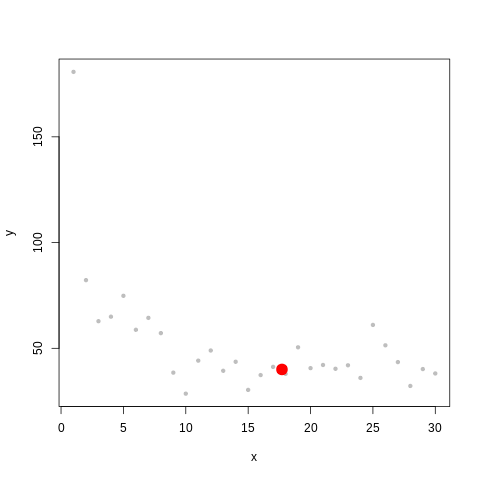

In [15]:
# Maximum curvature cutoff
%%R
library(KneeArrower,lib.loc = lib_loc)

Allcompanies <- sqldf("select avg(freq) as avg, number from tmp group by number",method = "name__class")

Allcompanies_post <- Allcompanies[Allcompanies$number>0,]

x = Allcompanies_post$number
y = Allcompanies_post$avg

# find the point at which the circle tangent to the curve has the smallest radius
# https://cran.r-project.org/web/packages/KneeArrower/vignettes/Example.html
cutoff.point <- findCutoff(x, y, method="curvature", 0.5)
print(cutoff.point)

# plot
plot(x, y, pch=20, col="gray")
points(cutoff.point, col="red", cex=3, pch=20)

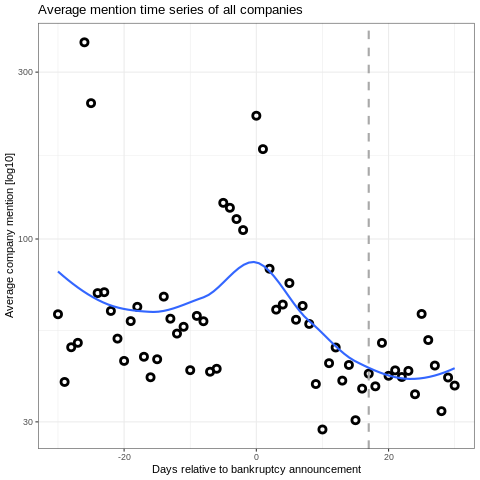

In [16]:
# All companies

%%R

p1<-  ggplot(Allcompanies, aes(x=number, y=avg)) + 
        geom_point(shape = 1, colour = "black", fill = "black", size = 2, stroke = 2) +
        #scale_x_continuous(trans = "log10") +
        scale_y_continuous(trans = "log10") +
        #geom_line()+
        geom_smooth(se=FALSE, formula = y ~ x, method = 'loess') +
        geom_vline(xintercept = 17, linetype=2, size = 1, colour="darkgray") +
        # pre-announcement mean
        ggtitle("Average mention time series of all companies") +
          ylab("Average company mention [log10]") + xlab("Days relative to bankruptcy announcement")+
        theme_bw()


ggsave("mean_curve.pdf", plot = p1, width = 6.67, height = 6.67, units = "in")
p1

## Identify High or Low persistence memory of companies that declared bankruptcy

### Compute the average #tweets before announcement AND average #tweets after the buzz fades out $(t \ge 17)$.

In [17]:
# mentions(t >= 17) > mean(mentions(t<t0)) --> High persistance
# mentionds(t > 17) <= mean(mentions(t<t0)) --> Low persistance

%%R

# average number of tweets before announcement
df2 <- sqldf("select company, avg(freq) as avg_freq from tmp where number < 0 group by company") # before
df2$When = "Before"

# average number of tweets after the buzz
df1 <- sqldf("select company, max(freq) as avg_freq from tmp where number > 17 group by company") # after
df1$When = "After"

df_1 <- rbind(df1,df2)

In [18]:
%%R 

df_2 <- merge(df2,df1, by = 'company', all.x = TRUE)

df_2$When.x <- NULL
df_2$When.y <- NULL

names(df_2) <- c("Company", "Before", "After")

df_2[is.na(df_2$After), 'After'] <- 0

### High persistence memory of companies

 [1] "Abengoa"         "Avaya"           "BrooksBrothers"  "Carestream"     
 [5] "CharlotteRusse"  "ChuckECheese"    "ClovisOncology"  "DIESEL"         
 [9] "DeanAndDeLuca"   "ECOtality"       "EMAS_offshore"   "ElizabethArden" 
[13] "Ferrellgas"      "GNCLiveWell"     "GoldsGym"        "Golfsmith"      
[17] "HMHCo"           "Hertz"           "IndonesiaGaruda" "KikoMilanoUSA"  
[21] "Kodak"           "LuckyBrand"      "MadCatz"         "MarieCallenders"
[25] "MattressFirm"    "MusclePharm"     "NineWest"        "RealGoods"      
[29] "RepublicAirways" "Rockport"        "Sears"           "Suntech_Connect"
[33] "TrueReligion"    "aeropostale"     "archcoal"        "beautybrands"   
[37] "belk"            "cineworld"       "claires"         "cobaltpowergrp" 
[41] "flyPAL"          "francescas"      "guitarcenter"    "jcpenney"       
[45] "jcrew"           "lordandtaylor"   "neimanmarcus"    "pier1"          
[49] "revlon"          "rue21"           "steinmart"       "terravia"       

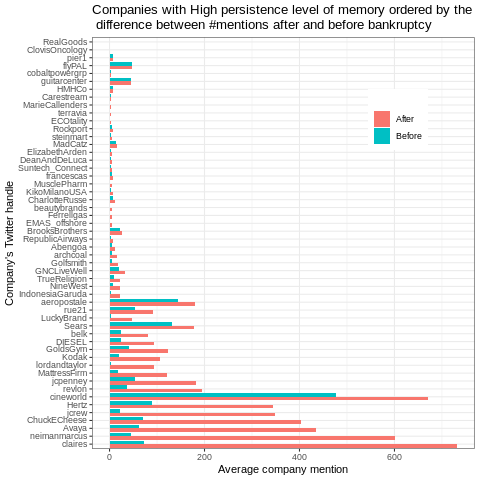

In [19]:
# Companies with more mentions (tweets) after the announcement than before the announcment 
# (i.e., they were not forgotten by the public --> High persistence)

%%R
unforgotten_comp <- df_1[df_1$company %in% (df_2[df_2$After >= df_2$Before,'Company']),]
print(unique(unforgotten_comp$company))

df <- merge(unforgotten_comp[unforgotten_comp$When == 'After', ], unforgotten_comp[unforgotten_comp$When == 'Before', ], by = 'company')
df$diff <- df$avg_freq.x - df$avg_freq.y
df1 <- df[,c(1,2,3,6)]
df2 <- df[,c(1,4,5,6)]

names(df1)<-c("company","avg_freq","When","diff")
names(df2)<-c("company","avg_freq","When","diff")
df <- rbind(df1,df2)


p5<- ggplot(df, aes(x = reorder(company, -diff), y = avg_freq, fill = When)) +
              geom_bar(stat = "identity", position = "dodge") +
              theme_bw()+
              theme( legend.position = c(0.8, 0.8)) +
              ggtitle("Companies with High persistence level of memory ordered by the \n difference between #mentions after and before bankruptcy") +
              ylab("Average company mention") +
              xlab("Company's Twitter handle") +
              coord_flip() +
              labs(fill = "") +
              scale_fill_discrete(labels = c("After", "Before"))

rm(df,df1,df2)

ggsave("SI_High_persistence.pdf", plot = p5, width = 6.67, height = 6.67, units = "in")
p5


### Low persistence memory of companies


 [1] "A123Systems"     "ArmstrongFloor"  "AvadelPharma"    "CumulusMedia"   
 [5] "DendreonNews"    "EFCoalition"     "EnergyGulfport"  "Forever21"      
 [9] "IndianaTollRoad" "Modells"         "MtGox"           "Perfumania"     
[13] "PyxusIntl"       "SunEdison"       "century21stores" "ftdflowers"     
[17] "hhgregg"         "iHeartMedia"     "investvoyager"   "lootcrate"      
[21] "peabodyenergy"   "sugarfina"       "BioRestorative"  "HMNYHQ1"        
[25] "LuckinCoffee"    "Momentive"       "linnenergy"      "verso_group"    


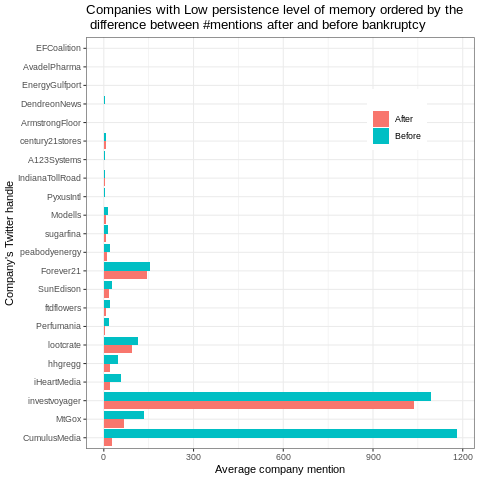

In [20]:
%%R

forgotten_comp <- df_1[df_1$company %in% (df_2[df_2$After < df_2$Before,'Company']),]
print(unique(forgotten_comp$company))


df <- merge(forgotten_comp[forgotten_comp$When == 'After', ], forgotten_comp[forgotten_comp$When == 'Before', ], by = 'company')
df$diff <- df$avg_freq.y - df$avg_freq.x
df1 <- df[,c(1,2,3,6)]
df2 <- df[,c(1,4,5,6)]

names(df1)<-c("company","avg_freq","When","diff")
names(df2)<-c("company","avg_freq","When","diff")
df <- rbind(df1,df2)


# bar plot
p6<- ggplot(df, aes(x = reorder(company, -diff), y = avg_freq, fill = When)) +
              geom_bar(stat = "identity", position = "dodge") +
              theme_bw()+
              theme( legend.position = c(0.8, 0.8)) +
              ggtitle("Companies with Low persistence level of memory ordered by the \n difference between #mentions after and before bankruptcy") +
              ylab("Average company mention") +
              xlab("Company's Twitter handle") +
              coord_flip() +
              labs(fill = "") +
              scale_fill_discrete(labels = c("After", "Before"))

rm(df,df1,df2)

ggsave("SI_Low_persistence.pdf", plot = p6, width = 6.67, height = 6.67, units = "in")
p6

## Models fitting

### GOF help functions

In [56]:
%%R

# AIC
gof <- function(model){
    
    return( 
              glance(model) %>% 
                  dplyr::select(adj.r.squared, sigma, AIC, BIC, p.value)
    )

}



# R^2
r_sqared <- function(model,y){
                    # Calculate R-squared
                    y_pred <- predict(model) # predicted values

                    ss_total <- sum((y - mean(y))^2)
                    ss_residual <- sum((y - y_pred)^2)
                    
                    r_squared <- (1 - ss_residual/ss_total) # R-squared
                    return(r_squared)
}

### High persistence memory of companies

In [57]:
# Unforgotten companies (have high persistence memory)

%%R

Unforgotten_companies <- unique(unforgotten_comp$company)

Unforgotten <- tmp[ (tmp$company) %in% (Unforgotten_companies) & tmp$number >=0, ] # number:= days before/after bankruptcy announcement

Unforgotten <- sqldf("select avg(freq) as avg, number from Unforgotten group by number",method = "name__class")

In [58]:
# models
%%R

Unforgotten$x = Unforgotten$number
Unforgotten$y = Unforgotten$avg

# Exponential
expmodel_uf <- lm(y~exp(x), data = Unforgotten)
print(summary(expmodel_uf))

# Log
logmodel_uf <- lm(y~log(x+0.01), data = Unforgotten)
print(summary(logmodel_uf))

# Hyperbolic
hyper_fit_uf <- nlsLM(y ~ a/(1 + b * x), data = Unforgotten, start = list(a = 1, b = 1))
print(summary(hyper_fit_uf))

# Biexponential
biexp_fit_uf <- nlsLM(y ~ a1*exp(-b1*x) + a2*exp(-b2*x), data = Unforgotten, start = c(a1 = 5, b1 = 2, a2 = 3, b2 = 0.5))
print(summary(biexp_fit_uf))

# Fit a power law curve using nls
power_fit_uf <- nls(y ~ a * (x+0.0001)^(-b), data = Unforgotten, start = list(a = 1, b = 1))
summary(power_fit_uf)


Call:
lm(formula = y ~ exp(x), data = Unforgotten)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.782 -16.979  -9.807   0.657 156.393 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.247e+01  7.240e+00   7.248 5.57e-08 ***
exp(x)      -1.201e-12  3.508e-12  -0.342    0.734    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.88 on 29 degrees of freedom
Multiple R-squared:  0.004028,	Adjusted R-squared:  -0.03032 
F-statistic: 0.1173 on 1 and 29 DF,  p-value: 0.7345


Call:
lm(formula = y ~ log(x + 0.01), data = Unforgotten)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.690 -13.346  -1.066   9.255  67.059 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    100.297      6.618  15.156 2.57e-15 ***
log(x + 0.01)  -21.440      2.440  -8.788 1.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.35 on

In [59]:
# AIC
%%R 

print(paste0("AIC exp: ", gof(expmodel_uf)$AIC))
print(paste0("AIC log: ",gof(logmodel_uf)$AIC))
print(paste0("AIC hypr: ",AIC(hyper_fit_uf)))
print(paste0("AIC biex: ",AIC(biexp_fit_uf)))
print(paste0("AIC power: ",AIC(power_fit_uf)))

[1] "AIC exp: 318.854181630786"
[1] "AIC log: 278.730646572734"
[1] "AIC hypr: 338.879310891664"
[1] "AIC biex: 247.819576574855"
[1] "AIC power: 283.745501854795"


In [60]:
# clac R^2 for non-linear models
%%R

print(paste0("R^2 exp: ",   round(r_sqared(expmodel_uf,Unforgotten$y),2)))
print(paste0("R^2 log: ",   round(r_sqared(logmodel_uf,Unforgotten$y),2)))
print(paste0("R^2 hypr: ",  round(r_sqared(hyper_fit_uf,Unforgotten$y),2)))
print(paste0("R^2 biex: ",  round(r_sqared(biexp_fit_uf,Unforgotten$y),2)))
print(paste0("R^2 power: ", round(r_sqared(power_fit_uf,Unforgotten$y),2)))

[1] "R^2 exp: 0"
[1] "R^2 log: 0.73"
[1] "R^2 hypr: -0.9"
[1] "R^2 biex: 0.91"
[1] "R^2 power: 0.68"


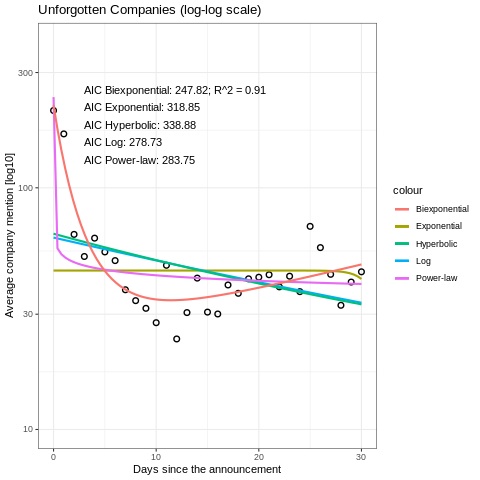

In [61]:
%%R

p2<-ggplot(Unforgotten, aes(x=number, y=avg)) + 
            geom_point(shape = 1, colour = "black", fill = "black", size = 2, stroke = 1) +
            #scale_x_continuous(trans = "log10", limits = c(1, 30)) +
            scale_y_continuous(trans = "log10", limits = c(10, 400)) +
            geom_smooth(method="lm", aes(color="Exponential"), formula= (y ~ exp(x)), se=FALSE, linetype = 1) +
            geom_smooth(method = "glm", aes(color="Log"), formula = y~x, se=FALSE, method.args = list(family = gaussian(link = 'log')),linetype = 1) +
            geom_smooth(method = "nls", aes(color = "Hyperbolic"), formula = y ~ a/(1 + b * x), start = list(a = 1, b = 1), se = FALSE, linetype = 1) +
            geom_smooth(method = "nls", aes(color = "Power-law"), formula = y ~ a * (x+0.0000001)^(-b), se = FALSE, method.args = list(start = list(a = 1, b = 1))) +
            geom_smooth(method = "nls", aes(color = "Biexponential"), formula = y ~ a1*exp(-b1*x) + a2*exp(-b2*x), se = FALSE, method.args = list(start = c(a1 = 5, b1 = 2, a2 = 3, b2 = 0.5))) +
            geom_smooth(method = "nls", aes(color = "Two-phaze"), formula = y ~ a1*exp^(-b1*x) + a2*x^(-b2), se = FALSE, method.args = list(start = c(a1 = 5, b1 = 2, a2 = 3, b2 = 0.5))) +
            ggtitle("Unforgotten Companies (log-log scale)") +
              ylab("Average company mention [log10]") + xlab("Days since the announcement")+
            annotate("text", x=3, y=255,  label= paste0("AIC Biexponential: ",round(AIC(biexp_fit_uf),2),("; R^2 = ") ,round(r_sqared(biexp_fit_uf,Unforgotten$y),2)),hjust = 0)+
            annotate("text", x=3, y=215, label= paste0("AIC Exponential: ", round(gof(expmodel_uf)$AIC,2)),hjust = 0) +
            annotate("text", x=3, y=182, label= paste0("AIC Hyperbolic: ",round(AIC(hyper_fit_uf),2)),hjust = 0)+
            annotate("text", x=3, y=155, label= paste0("AIC Log: ",round(gof(logmodel_uf)$AIC,2)),hjust = 0)+
            annotate("text", x=3, y=130, label= paste0("AIC Power-law: ",round(AIC(power_fit_uf),2)),hjust = 0)+
            theme_bw()


ggsave("Unforgotten_models.pdf", plot = p2, width = 6.67, height = 6.67, units = "in")
p2

### Low persistence memory of companies

In [62]:
# Forgotten companies

%%R
forgotten_companies <- unique(forgotten_comp$company)

forgotten <- tmp[ (tmp$company) %in% (forgotten_companies) & tmp$number >=0, ] # number:= number of days since bankruptcy announcement

forgotten <- sqldf("select avg(freq) as avg, number from forgotten group by number",method = "name__class")

In [63]:
# models
%%R

forgotten$x = forgotten$number
forgotten$y = forgotten$avg

# Exponential
expmodel_f <- lm(y~exp(x), data = forgotten)
print(summary(expmodel_f))

# Log
logmodel_f <- lm(y~log(x+0.01), data = forgotten)
print(summary(logmodel_f))

# Hyperbolic
hyper_fit_f <- nlsLM(y ~ a/(1 + b * x), data = forgotten, start = list(a = 1, b = 1))
print(summary(hyper_fit_f))

# Biexponential
biexp_fit_f <- nlsLM(y ~ a1*exp(-b1*x) + a2*exp(-b2*x), data = forgotten, start = c(a1 = 5, b1 = 2, a2 = 3, b2 = 0.5))
print(summary(biexp_fit_f))

# Fit a power law curve using nls
power_fit_f <- nls(y ~ a * (x+0.0001)^(-b), data = forgotten, start = list(a = 1, b = 1))
summary(power_fit_f)


Call:
lm(formula = y ~ exp(x), data = forgotten)

Residuals:
   Min     1Q Median     3Q    Max 
-43.27 -34.16 -17.62  10.16 186.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.300e+01  9.920e+00   7.359 4.16e-08 ***
exp(x)      -7.285e-12  4.806e-12  -1.516     0.14    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.27 on 29 degrees of freedom
Multiple R-squared:  0.07341,	Adjusted R-squared:  0.04146 
F-statistic: 2.298 on 1 and 29 DF,  p-value: 0.1404


Call:
lm(formula = y ~ log(x + 0.01), data = forgotten)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.061 -12.339  -4.702   3.738  68.238 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    140.893      8.212   17.16  < 2e-16 ***
log(x + 0.01)  -31.783      3.028  -10.50 2.17e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.26 on 29 degrees of fr

In [64]:
%%R
print(paste0("AIC exp: ", gof(expmodel_f)$AIC))
print(paste0("AIC log: ",gof(logmodel_f)$AIC))
print(paste0("AIC hypr: ",AIC(hyper_fit_f)))
print(paste0("AIC biex: ",AIC(biexp_fit_f)))
print(paste0("AIC power: ",AIC(power_fit_f)))

[1] "AIC exp: 338.380993902213"
[1] "AIC log: 292.11755913379"
[1] "AIC hypr: 360.715040004244"
[1] "AIC biex: 288.176535389583"
[1] "AIC power: 314.607894596952"


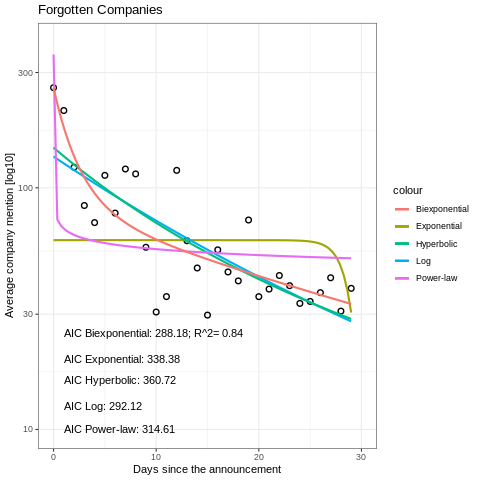

In [65]:
%%R

p3<-ggplot(forgotten, aes(x=number, y=avg)) + 
            geom_point(shape = 1, colour = "black", fill = "black", size = 2, stroke = 1) +
            #scale_x_continuous(trans = "log10", limits = c(1, 30)) +
            scale_y_continuous(trans = "log10", limits = c(10, 400)) +
            #coord_cartesian(ylim = c(0,500)) +
            geom_smooth(method="lm", aes(color="Exponential"), formula= (y ~ exp(x)), se=FALSE, linetype = 1) +
            geom_smooth(method = "glm", aes(color="Log"), formula = y~x, se=FALSE, method.args = list(family = gaussian(link = 'log')),linetype = 1) +
            geom_smooth(method = "nls", aes(color = "Hyperbolic"), formula = y ~ a/(1 + b * x), start = list(a = 1, b = 1), se = FALSE, linetype = 1) +
            geom_smooth(method = "nls", aes(color = "Power-law"), formula = y ~ a * (x+0.0000001)^(-b), se = FALSE, method.args = list(start = list(a = 1, b = 1))) +
            geom_smooth(method = "nls", aes(color = "Biexponential"), formula = y ~ a1*exp(-b1*x) + a2*exp(-b2*x), se = FALSE, method.args = list(start = c(a1 = 5, b1 = 2, a2 = 3, b2 = 0.5))) +
            ggtitle("Forgotten Companies") +
              ylab("Average company mention [log10]") + xlab("Days since the announcement")+
            annotate("text", x=1, y=25,  label= paste0("AIC Biexponential: ",round(AIC(biexp_fit_f),2),"; ",expression(R^2), "= " ,round(r_sqared(biexp_fit_f,forgotten$y),2)),hjust = 0)+
            annotate("text", x=1, y=19.5, label= paste0("AIC Exponential: ", round(gof(expmodel_f)$AIC,2)),hjust = 0) +
            annotate("text", x=1, y=16, label= paste0("AIC Hyperbolic: ",round(AIC(hyper_fit_f),2)),hjust = 0)+
            annotate("text", x=1, y=12.5, label= paste0("AIC Log: ",round(gof(logmodel_f)$AIC,2)),hjust = 0)+
            annotate("text", x=1, y=10, label= paste0("AIC Power-law: ",round(AIC(power_fit_f),2)),hjust = 0)+
            theme_bw()

ggsave("forgotten_models.pdf", plot = p3, width = 6.67, height = 6.67, units = "in")
p3

## Inter tweet time

In [68]:
%%R
data <- read_csv(paste0(PTH1,"2012_2022_bankruptcy2.csv"), show_col_types = FALSE)


# split data into before and after the announcement
before <- data[grepl( 'before', data$data, fixed = TRUE),]
after <- data[grepl( 'after', data$data, fixed = TRUE),]

# delete messages originated by the companies
after <- after[!after$author_id %in% metadata$UserID,]
before <- before[!before$author_id %in% metadata$UserID,]



# keep only companies that we want to analyze
after<-after[after$company %in% tmp$company,]
before<-before[before$company %in% tmp$company,]

In [69]:
%%R
# before High persistence (unforgotten)
before_unforgot <- before[before$company %in% (Unforgotten_companies),]
my_datetime <- as.POSIXct(before_unforgot$created_at, format="%Y-%m-%d %H:%M:%S", tz="UTC")
my_datetime <- my_datetime[order(as.Date(my_datetime), decreasing = TRUE)]
my_datetime <- cbind(my_datetime[1:(length(my_datetime)-1)], my_datetime[2:(length(my_datetime))])

# inter Tweet time
inter_Tweet_time_before_unforgot <- data.frame(my_datetime[,1] - my_datetime[,2])
names(inter_Tweet_time_before_unforgot) <- "diff_before_unforgot"

In [70]:
%%R
# before Low persistence (forgotten)
before_forgot <- before[before$company %in% (forgotten_companies),]
my_datetime <- as.POSIXct(before_forgot$created_at, format="%Y-%m-%d %H:%M:%S", tz="UTC")
my_datetime <- my_datetime[order(as.Date(my_datetime), decreasing = TRUE)]
my_datetime <- cbind(my_datetime[1:(length(my_datetime)-1)], my_datetime[2:(length(my_datetime))])

# inter Tweet time
inter_Tweet_time_before_forgot <- data.frame(my_datetime[,1] - my_datetime[,2])
names(inter_Tweet_time_before_forgot) <- "diff_before_forgot"

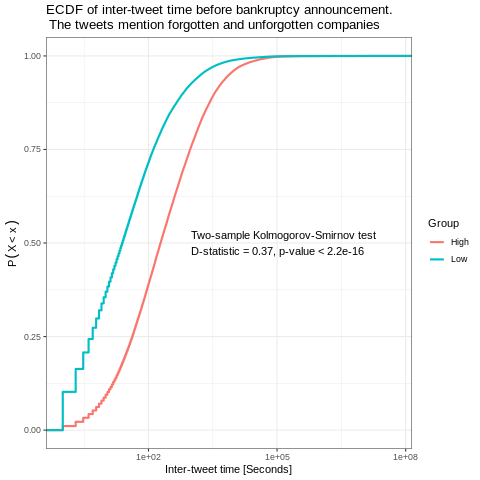

In [71]:
%%R
library(ggplot2)

# Create example data with two vectors of unequal lengths
set.seed(123)
x <- inter_Tweet_time_before_forgot$diff_before_forgot
y <- inter_Tweet_time_before_unforgot$diff_before_unforgot

# Merge the two vectors into a single data frame
df <- data.frame(Inter_Tweet_Time = c(x, y),
                 Group = factor(rep(c("Low", "High"), c(length(x), length(y)))))

# Create ECDF plot
p4 <- ggplot(df, aes(Inter_Tweet_Time, color = Group)) +
          stat_ecdf(size = 1) +
          scale_x_log10() +
          #scale_y_log10() +
          ggtitle("ECDF of inter-tweet time before bankruptcy announcement. \n The tweets mention forgotten and unforgotten companies") +
            ylab(expression(P(X<x))) + xlab("Inter-tweet time [Seconds]")+
          annotate("text", x=1e+3, y=0.5, label= paste0("Two-sample Kolmogorov-Smirnov test \n", "D-statistic = 0.37, p-value < 2.2e-16"),hjust = 0) +
          theme_bw()


ggsave("ecdf.pdf", plot = p4, width = 6.67, height = 6.67, units = "in")
p4


To test H1 and reveal whether forgotten and unforgotten companies have different temporal inforamtion spreading patterns, we compare the distribution of the ECDFs by using the Kolmogorov-Smirnov (KS) D-statistic test. 
The D-statistic is defined as the maximum distance: D = max(|F1(x) − F2(x)|), where x represents the range of the random variable, and F1 and F2 represent the empirical cumulative distributions functions. 
The smaller the distance, the more similar the distribution curves and, hence, the more likely are the two samples to come from the same distribution.
In the KS-test, a p_value < 0.05 indicates that the samples are **not** drawn from the same distribution

In [72]:
# KS-test
%%R

ks.test(x, y)


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.37415, p-value < 2.2e-16
alternative hypothesis: two-sided



## Generate feture for logistic regression


1. **avg_time_from_first** - Time difference from the posting of the FIRST tweet about the company.
  * Captures bursty user interactions [59, 60], which can explain contagion spread [61].

2. **Pre-announcement mean**: Arithmetic mean of number of mentions in days $t \in [-30, 0]$, prior to bankruptcy announcement.


3. **Followers**


4. **Short-term boost**: Maximum mentions during days $t=0$ through $t=6$ following bankruptcy announcement, minus the pre-announcement mean.

5. **Long-term boost**

6. **number of tweets before**

7. **average tweet length**

8. **average tweet sentiment**

#### data preperation

In [75]:
# help functions
%%R

# histogram and statistics
histme<-function(x){
                        #hist(x, prob = TRUE, breaks = 50, xlab = "Average company mentions per day")
                        #lines(density(x), col = "blue", lwd = 3)

                        print(paste0("mean: ",mean(x)))

                        print(paste0("mean CI: ", t.test(x)$conf.int))

                        MedianCI(x,
                                conf.level = 0.95,
                                na.rm = FALSE,
                                method = "exact",
                                R = 10000)
}





# remove outliers and recalulate the Pre-announcement mean (PAM)

PAM_remove_outliers <- function(x){
    
    # Identify and remove outliers
    outliers <- boxplot(x, plot=FALSE)$out
    x_no_outliers <- x[!x %in% outliers]
    return(mean(x_no_outliers))

}

In [76]:
# 1) Average time difference betweeb the posting time of a tweet and the posting of the FIRST tweet about the company

%%R

before <- before %>% group_by(company) %>% mutate(min_value = min(created_at)) # find the time of the first post

before$time_from_first <- as.Date(before$created_at) - as.Date(before$min_value)

result <- sqldf("select company, avg(time_from_first) as avg_time_from_first from before group by company")


In [77]:
# 2) Pre-announcement mean
%%R

# create empty dataframe
Pre_announcement_mean <- data.frame()
Pre_announcement_mean$company = character()
Pre_announcement_mean$Pre_announcement_mean = numeric()

for(comp in unique(tmp$company)){
    
    x <- tmp[tmp$company == comp & tmp$number<0,'freq']
    mean_PAM <- PAM_remove_outliers(x)
    Pre_announcement_mean <- rbind( Pre_announcement_mean,
                                    data.frame(
                                                  company = comp, 
                                                  Pre_announcement_mean = mean_PAM
                                                )
                                      )
}

#Pre_announcement_mean = sqldf("select avg(freq) as Pre_announcement_mean, company from tmp where number<0 group by company")

result$Pre_announcement_mean <- NULL
result <- merge(result, Pre_announcement_mean, by = 'company')

histme(result[result$Pre_announcement_mean>0,'Pre_announcement_mean']) 

[1] "mean: 32.1872749549177"
[1] "mean CI: 11.9254672097901" "mean CI: 52.4490827000454"
  median   lwr.ci   upr.ci 
5.092593 2.782609 9.931034 
attr(,"conf.level")
[1] 0.9670074


In [78]:
# 3) Followers

%%R

df <- metadata[,c('Company','Twitter Username','Followers', 'Following','Avg_Google_Trends')]

result <- merge(result, df,  by.x = 'company', by.y = 'Twitter Username')

In [79]:
# 4) Short-term boost
%%R

Short_term_boost <- sqldf("select max(freq) as shrt_boost, company from tmp where number between -1 and 17 group by company")

result$shrt_boost<-NULL

result <- merge(result, Short_term_boost, by = 'company')

result$shrt_boost <- result$shrt_boost - result$Pre_announcement_mean

histme(result$shrt_boost) 

[1] "mean: 212.582506374767"
[1] "mean CI: 95.27475715417"   "mean CI: 329.890255595364"
  median   lwr.ci   upr.ci 
35.88000 13.92308 79.41379 
attr(,"conf.level")
[1] 0.9578346


In [80]:
# 5) Long-term Boost
%%R

Long_term_boost <- sqldf("select max(freq) as lng_boost, company from tmp where `when`='after'and number > 17 group by company")


result$lng_boost<-NULL
result <- merge(result, Long_term_boost, by = 'company', all.x = TRUE)

result$lng_boost<-result$lng_boost - result$Pre_announcement_mean

histme(result[!is.na(result$lng_boost),'lng_boost']) 

[1] "mean: 59.5312968530582"
[1] "mean CI: 28.7250942604426" "mean CI: 90.3374994456738"
   median    lwr.ci    upr.ci 
 4.392857  2.758621 11.642857 
attr(,"conf.level")
[1] 0.9655841


In [81]:
# 6) number of tweets before
%%R 

df <- sqldf("select sum(freq) as number_of_tweets_before, company from tmp where number < 0 group by company")

result$number_of_tweets_before<-NULL
result <- merge(result, df, by = 'company', all.x = TRUE)

In [82]:
# 7) Average tweet length
%%R 

before$txt_length <- nchar(before$text)

df = sqldf("select company, avg(txt_length) as avg_txt_len from before group by company")

result$avg_txt_len<-NULL
result <- merge(result, df, by = 'company', all.x = TRUE)

In [83]:
# 8) Average tweet sentiment
%R -o before

In [85]:
# Get the sentiment score of a text vector

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for text in before['text']:
  scores = analyzer.polarity_scores(text)
  sentiment_scores.append( scores['compound'] )

In [86]:
before['sentiment'] = sentiment_scores

In [87]:
%R -i before

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [88]:
# Average tweet sentiment
%%R 

sentiment = sqldf("select company, avg(sentiment) as avg_sentiment from before group by company")

result <- merge(result, sentiment, by = 'company', all.x = TRUE)

In [89]:
# public or private company
%%R 

result <- merge(result, metadata[,c('Twitter Username','Private_Public')], by.x = 'company' , by.y =  'Twitter Username', all.x = TRUE)

result$Private_Public <- tolower(result$Private_Public)

result[result$Private_Public == 'public pb', 'Private_Public'] <- 'public' # taken private post-bankruptcy

In [90]:
%R result$Private_Public <- tolower(result$Private_Public)

'public','public','public',...,'public','public','public'


## Regression

In [ ]:
# set target variable
%%R

result$y <- 0 # zero means High persistence
result[result$company %in% forgotten_companies, 'y'] <- 1 # means Low persistence

result$company_name <- NULL

result$y <- as.factor(result$y)

In [ ]:
%%R

# Specify the proportion of data to be used for train
train_proportion <- 0.7

# Split the data into training and test sets
set.seed(123) # Set a random seed for reproducibility
train_indices <- createDataPartition(y = result$y, p = train_proportion, list = FALSE)
train_data <- result[train_indices, ]
test_data <- result[-train_indices, ]

In [ ]:
%R result

In [ ]:
# logistic regression

%%R

# define training control cross validation
train_control <- trainControl(method = "cv", number = 10)

# train the model on training set
model <- train(y ~ avg_time_from_first + Private_Public + avg_sentiment + avg_txt_len + Pre_announcement_mean + number_of_tweets_before + Followers + Following + shrt_boost,
               family = binomial(),
               trControl = train_control,
               method = "glmStepAIC",
               direction ="backward", # forward
               data = train_data,
               trace = 2)

Start:  AIC=60.91
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   40.912 58.912
- avg_txt_len              1   40.914 58.914
- Following                1   41.044 59.044
- avg_sentiment            1   41.246 59.246
- shrt_boost               1   41.256 59.256
- Private_Publicpublic     1   42.784 60.784
<none>                         40.911 60.911
- avg_time_from_first      1   43.544 61.544
- Pre_announcement_mean    1   55.414 73.414
- number_of_tweets_before  1   56.803 74.803

Step:  AIC=58.91
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   40.916 56.916
- Following                1   41.052 57.052
- avg_sentiment            1   41.246 57.246
- shrt_boost               1   41.260 57.260
- Private_Publicpublic     1   42.785 58.785
<none>                         40.912 58.912
- avg_time_from_first      1   43.637 59.637
- Pre_announcement_mean    1   56.077 72.077
- number_of_tweets_before  1   57.522 73.522

Step:  AIC=56.92
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- Following                1   41.057 55.057
- avg_sentiment            1   41.246 55.246
- shrt_boost               1   41.265 55.265
- Private_Publicpublic     1   42.818 56.818
<none>                         40.916 56.916
- avg_time_from_first      1   43.650 57.650
- Pre_announcement_mean    1   56.156 70.156
- number_of_tweets_before  1   57.563 71.563

Step:  AIC=55.06
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   41.366 53.366
- shrt_boost               1   41.665 53.665
- Private_Publicpublic     1   42.821 54.821
<none>                         41.057 55.057
- avg_time_from_first      1   43.823 55.823
- Pre_announcement_mean    1   57.851 69.851
- number_of_tweets_before  1   58.925 70.925

Step:  AIC=53.37
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   41.774 51.774
- Private_Publicpublic     1   43.012 53.012
<none>                         41.366 53.366
- avg_time_from_first      1   45.998 55.998
- Pre_announcement_mean    1   57.958 67.958
- number_of_tweets_before  1   58.998 68.998

Step:  AIC=51.77
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
<none>                         41.774 51.774
- Private_Publicpublic     1   43.990 51.990
- avg_time_from_first      1   46.911 54.911
- Pre_announcement_mean    1   57.985 65.985
- number_of_tweets_before  1   59.366 67.366
Start:  AIC=1101.31
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance     AIC
- number_of_tweets_before  1    50.53   68.53
- Pre_announcement_mean    1    50.71   68.71
- Followers                1   792.96  810.96
- shrt_boost               1   865.05  883.05
- Private_Publicpublic     1   937.13  955.13
- Following                1   937.13  955.13
- avg_txt_len              1  1081.31 1099.31
<none>                        1081.31 1101.31
- avg_time_from_first      1  1153.40 1171.40
- avg_sentiment            1  1153.40 1171.40

Step:  AIC=68.53
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + Followers + Following + 
    shrt_boost



                        Df Deviance    AIC
- avg_sentiment          1   50.597 66.597
- Pre_announcement_mean  1   50.751 66.751
- Followers              1   51.254 67.254
- avg_txt_len            1   51.465 67.465
- Following              1   51.708 67.708
- Private_Publicpublic   1   52.449 68.449
<none>                       50.528 68.528
- shrt_boost             1   53.206 69.206
- avg_time_from_first    1   53.349 69.349

Step:  AIC=66.6
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + Followers + Following + shrt_boost



                        Df Deviance    AIC
- Pre_announcement_mean  1   50.844 64.844
- Followers              1   51.322 65.322
- avg_txt_len            1   51.584 65.584
- Following              1   51.736 65.736
- Private_Publicpublic   1   52.493 66.493
<none>                       50.597 66.597
- shrt_boost             1   53.206 67.206
- avg_time_from_first    1   53.802 67.802

Step:  AIC=64.84
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Followers + Following + shrt_boost



                       Df Deviance    AIC
- avg_txt_len           1   51.764 63.764
- Followers             1   51.806 63.806
- Private_Publicpublic  1   52.590 64.590
<none>                      50.844 64.844
- Following             1   53.004 65.004
- avg_time_from_first   1   54.486 66.486
- shrt_boost            1   55.265 67.265

Step:  AIC=63.76
.outcome ~ avg_time_from_first + Private_Publicpublic + Followers + 
    Following + shrt_boost



                       Df Deviance    AIC
- Followers             1   52.675 62.675
- Private_Publicpublic  1   53.698 63.698
<none>                      51.764 63.764
- Following             1   54.045 64.045
- avg_time_from_first   1   55.649 65.649
- shrt_boost            1   56.377 66.377

Step:  AIC=62.67
.outcome ~ avg_time_from_first + Private_Publicpublic + Following + 
    shrt_boost



                       Df Deviance    AIC
- Private_Publicpublic  1   54.212 62.212
- Following             1   54.550 62.550
<none>                      52.675 62.675
- shrt_boost            1   56.885 64.885
- avg_time_from_first   1   57.027 65.027

Step:  AIC=62.21
.outcome ~ avg_time_from_first + Following + shrt_boost



                      Df Deviance    AIC
- Following            1   55.511 61.511
<none>                     54.212 62.212
- shrt_boost           1   58.054 64.054
- avg_time_from_first  1   62.149 68.149

Step:  AIC=61.51
.outcome ~ avg_time_from_first + shrt_boost



                      Df Deviance    AIC
<none>                     55.511 61.511
- shrt_boost           1   59.033 63.033
- avg_time_from_first  1   63.831 67.831
Start:  AIC=57.45
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   37.446 55.446
- avg_sentiment            1   37.446 55.446
- Followers                1   37.448 55.448
- shrt_boost               1   37.458 55.458
- Following                1   37.836 55.836
- Private_Publicpublic     1   39.176 57.176
<none>                         37.446 57.446
- avg_time_from_first      1   41.220 59.220
- Pre_announcement_mean    1   52.478 70.478
- number_of_tweets_before  1   53.554 71.554

Step:  AIC=55.45
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   37.446 53.446
- Followers                1   37.448 53.448
- shrt_boost               1   37.458 53.458
- Following                1   37.837 53.837
- Private_Publicpublic     1   39.208 55.208
<none>                         37.446 55.446
- avg_time_from_first      1   41.326 57.326
- Pre_announcement_mean    1   52.508 68.508
- number_of_tweets_before  1   53.568 69.568

Step:  AIC=53.45
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Followers + Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   37.448 51.448
- shrt_boost               1   37.458 51.458
- Following                1   37.841 51.841
- Private_Publicpublic     1   39.217 53.217
<none>                         37.446 53.446
- avg_time_from_first      1   41.934 55.934
- Pre_announcement_mean    1   52.573 66.573
- number_of_tweets_before  1   53.619 67.619

Step:  AIC=51.45
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following + shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   37.460 49.460
- Following                1   37.868 49.868
- Private_Publicpublic     1   39.228 51.228
<none>                         37.448 51.448
- avg_time_from_first      1   42.016 54.016
- Pre_announcement_mean    1   53.223 65.223
- number_of_tweets_before  1   54.231 66.231

Step:  AIC=49.46
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   37.904 47.904
- Private_Publicpublic     1   39.383 49.383
<none>                         37.460 49.460
- avg_time_from_first      1   42.019 52.019
- Pre_announcement_mean    1   53.544 63.544
- number_of_tweets_before  1   54.893 64.893

Step:  AIC=47.9
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
- Private_Publicpublic     1   39.551 47.551
<none>                         37.904 47.904
- avg_time_from_first      1   42.825 50.825
- Pre_announcement_mean    1   55.144 63.144
- number_of_tweets_before  1   56.484 64.484

Step:  AIC=47.55
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
<none>                         39.551 47.551
- avg_time_from_first      1   46.817 52.817
- Pre_announcement_mean    1   56.515 62.515
- number_of_tweets_before  1   58.002 64.002
Start:  AIC=53.93
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   33.957 51.957
- avg_txt_len              1   33.970 51.970
- avg_sentiment            1   34.009 52.009
- Private_Publicpublic     1   34.457 52.457
- Following                1   34.692 52.692
- shrt_boost               1   35.495 53.495
<none>                         33.934 53.934
- avg_time_from_first      1   40.629 58.629
- Pre_announcement_mean    1   55.360 73.360
- number_of_tweets_before  1   56.785 74.785

Step:  AIC=51.96
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   33.990 49.990
- avg_sentiment            1   34.031 50.031
- Private_Publicpublic     1   34.474 50.474
- Following                1   34.753 50.753
- shrt_boost               1   35.500 51.500
<none>                         33.957 51.957
- avg_time_from_first      1   40.709 56.709
- Pre_announcement_mean    1   56.078 72.078
- number_of_tweets_before  1   57.438 73.438

Step:  AIC=49.99
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   34.058 48.058
- Private_Publicpublic     1   34.488 48.488
- Following                1   34.774 48.774
- shrt_boost               1   35.549 49.549
<none>                         33.990 49.990
- avg_time_from_first      1   40.829 54.829
- Pre_announcement_mean    1   56.113 70.113
- number_of_tweets_before  1   57.462 71.462

Step:  AIC=48.06
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following + shrt_boost



                          Df Deviance    AIC
- Private_Publicpublic     1   34.639 46.639
- Following                1   34.792 46.792
- shrt_boost               1   35.722 47.722
<none>                         34.058 48.058
- avg_time_from_first      1   41.407 53.407
- Pre_announcement_mean    1   56.616 68.616
- number_of_tweets_before  1   57.875 69.875

Step:  AIC=46.64
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before + 
    Following + shrt_boost



                          Df Deviance    AIC
- Following                1   36.162 46.162
<none>                         34.639 46.639
- shrt_boost               1   38.124 48.124
- avg_time_from_first      1   44.042 54.042
- Pre_announcement_mean    1   56.937 66.937
- number_of_tweets_before  1   58.295 68.295

Step:  AIC=46.16
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before + 
    shrt_boost



                          Df Deviance    AIC
<none>                         36.162 46.162
- shrt_boost               1   38.371 46.371
- avg_time_from_first      1   44.850 52.850
- Pre_announcement_mean    1   58.662 66.662
- number_of_tweets_before  1   59.226 67.226
Start:  AIC=57.02
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   37.025 55.025
- Followers                1   37.037 55.037
- shrt_boost               1   37.075 55.075
- avg_sentiment            1   37.177 55.177
- Following                1   37.503 55.503
- Private_Publicpublic     1   38.791 56.791
<none>                         37.018 57.018
- avg_time_from_first      1   42.019 60.019
- Pre_announcement_mean    1   53.336 71.336
- number_of_tweets_before  1   54.402 72.402

Step:  AIC=55.02
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   37.042 53.042
- shrt_boost               1   37.085 53.085
- avg_sentiment            1   37.183 53.183
- Following                1   37.506 53.506
- Private_Publicpublic     1   38.796 54.796
<none>                         37.025 55.025
- avg_time_from_first      1   42.099 58.099
- Pre_announcement_mean    1   53.338 69.338
- number_of_tweets_before  1   54.412 70.412

Step:  AIC=53.04
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   37.101 51.101
- avg_sentiment            1   37.203 51.203
- Following                1   37.507 51.507
- Private_Publicpublic     1   38.810 52.810
<none>                         37.042 53.042
- avg_time_from_first      1   42.136 56.136
- Pre_announcement_mean    1   53.784 67.784
- number_of_tweets_before  1   54.864 68.864

Step:  AIC=51.1
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following



                          Df Deviance    AIC
- avg_sentiment            1   37.233 49.233
- Following                1   37.829 49.829
<none>                         37.101 51.101
- Private_Publicpublic     1   39.373 51.373
- avg_time_from_first      1   42.680 54.680
- Pre_announcement_mean    1   53.922 65.922
- number_of_tweets_before  1   55.203 67.203

Step:  AIC=49.23
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   37.868 47.868
<none>                         37.233 49.233
- Private_Publicpublic     1   39.395 49.395
- avg_time_from_first      1   44.043 54.043
- Pre_announcement_mean    1   53.922 63.922
- number_of_tweets_before  1   55.205 65.205

Step:  AIC=47.87
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
- Private_Publicpublic     1   39.704 47.704
<none>                         37.868 47.868
- avg_time_from_first      1   44.988 52.988
- Pre_announcement_mean    1   55.227 63.227
- number_of_tweets_before  1   56.565 64.565

Step:  AIC=47.7
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
<none>                         39.704 47.704
- avg_time_from_first      1   48.969 54.969
- Pre_announcement_mean    1   55.300 61.300
- number_of_tweets_before  1   56.666 62.666
Start:  AIC=58.72
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   38.723 56.723
- avg_sentiment            1   38.723 56.723
- shrt_boost               1   38.788 56.788
- Following                1   39.462 57.462
- avg_txt_len              1   40.208 58.208
- Private_Publicpublic     1   40.261 58.261
<none>                         38.723 58.723
- avg_time_from_first      1   40.774 58.774
- Pre_announcement_mean    1   52.207 70.207
- number_of_tweets_before  1   53.751 71.751

Step:  AIC=56.72
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   38.723 54.723
- shrt_boost               1   38.788 54.788
- Following                1   39.474 55.474
- avg_txt_len              1   40.210 56.210
- Private_Publicpublic     1   40.262 56.262
<none>                         38.723 56.723
- avg_time_from_first      1   40.820 56.820
- Pre_announcement_mean    1   52.925 68.925
- number_of_tweets_before  1   54.488 70.488

Step:  AIC=54.72
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   38.792 52.792
- Following                1   39.475 53.475
- avg_txt_len              1   40.213 54.213
- Private_Publicpublic     1   40.266 54.266
<none>                         38.723 54.723
- avg_time_from_first      1   41.059 55.059
- Pre_announcement_mean    1   53.314 67.314
- number_of_tweets_before  1   54.865 68.865

Step:  AIC=52.79
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   39.851 51.851
- avg_txt_len              1   40.264 52.264
- Private_Publicpublic     1   40.653 52.653
<none>                         38.792 52.792
- avg_time_from_first      1   41.315 53.315
- Pre_announcement_mean    1   53.402 65.402
- number_of_tweets_before  1   55.133 67.133

Step:  AIC=51.85
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
- avg_txt_len              1   41.023 51.023
- Private_Publicpublic     1   41.239 51.239
<none>                         39.851 51.851
- avg_time_from_first      1   42.866 52.866
- Pre_announcement_mean    1   54.518 64.518
- number_of_tweets_before  1   56.325 66.325

Step:  AIC=51.02
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
<none>                         41.023 51.023
- Private_Publicpublic     1   43.105 51.105
- avg_time_from_first      1   45.494 53.494
- Pre_announcement_mean    1   57.097 65.097
- number_of_tweets_before  1   58.543 66.543
Start:  AIC=56.29
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   36.291 54.291
- avg_sentiment            1   36.398 54.398
- shrt_boost               1   37.092 55.092
- Following                1   37.471 55.471
- Private_Publicpublic     1   38.051 56.051
<none>                         36.287 56.287
- avg_time_from_first      1   39.375 57.375
- Followers                1   39.444 57.444
- Pre_announcement_mean    1   53.437 71.437
- number_of_tweets_before  1   54.647 72.647

Step:  AIC=54.29
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   36.401 52.401
- shrt_boost               1   37.110 53.110
- Following                1   37.471 53.471
- Private_Publicpublic     1   38.051 54.051
<none>                         36.291 54.291
- avg_time_from_first      1   39.428 55.428
- Followers                1   39.446 55.446
- Pre_announcement_mean    1   53.441 69.441
- number_of_tweets_before  1   54.647 70.647

Step:  AIC=52.4
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Followers + Following + shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   37.119 51.119
- Following                1   37.513 51.513
- Private_Publicpublic     1   38.103 52.103
<none>                         36.401 52.401
- Followers                1   39.484 53.484
- avg_time_from_first      1   40.615 54.615
- Pre_announcement_mean    1   53.442 67.442
- number_of_tweets_before  1   54.648 68.648

Step:  AIC=51.12
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Followers + Following



                          Df Deviance    AIC
- Following                1   38.722 50.722
<none>                         37.119 51.119
- Private_Publicpublic     1   39.140 51.140
- Followers                1   39.572 51.572
- avg_time_from_first      1   42.107 54.107
- Pre_announcement_mean    1   53.461 65.461
- number_of_tweets_before  1   54.789 66.789

Step:  AIC=50.72
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Followers



                          Df Deviance    AIC
- Private_Publicpublic     1   39.800 49.800
- Followers                1   39.845 49.845
<none>                         38.722 50.722
- avg_time_from_first      1   43.910 53.910
- Pre_announcement_mean    1   54.792 64.792
- number_of_tweets_before  1   56.168 66.168

Step:  AIC=49.8
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before + 
    Followers



                          Df Deviance    AIC
- Followers                1   40.633 48.633
<none>                         39.800 49.800
- avg_time_from_first      1   47.959 55.959
- Pre_announcement_mean    1   54.853 62.853
- number_of_tweets_before  1   56.258 64.258

Step:  AIC=48.63
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
<none>                         40.633 48.633
- avg_time_from_first      1   48.030 54.030
- Pre_announcement_mean    1   54.853 60.853
- number_of_tweets_before  1   56.260 62.260
Start:  AIC=59.8
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   39.800 57.800
- Followers                1   39.806 57.806
- avg_txt_len              1   39.841 57.841
- avg_sentiment            1   39.889 57.889
- Following                1   40.188 58.188
- Private_Publicpublic     1   40.724 58.724
<none>                         39.800 59.800
- avg_time_from_first      1   43.310 61.310
- Pre_announcement_mean    1   55.753 73.753
- number_of_tweets_before  1   56.880 74.880

Step:  AIC=57.8
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following



                          Df Deviance    AIC
- Followers                1   39.806 55.806
- avg_txt_len              1   39.841 55.841
- avg_sentiment            1   39.894 55.894
- Following                1   40.250 56.250
- Private_Publicpublic     1   40.773 56.773
<none>                         39.800 57.800
- avg_time_from_first      1   43.375 59.375
- Pre_announcement_mean    1   56.030 72.030
- number_of_tweets_before  1   57.517 73.517

Step:  AIC=55.81
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Following



                          Df Deviance    AIC
- avg_txt_len              1   39.845 53.845
- avg_sentiment            1   39.902 53.902
- Following                1   40.256 54.256
- Private_Publicpublic     1   40.774 54.774
<none>                         39.806 55.806
- avg_time_from_first      1   43.416 57.416
- Pre_announcement_mean    1   56.524 70.524
- number_of_tweets_before  1   58.036 72.036

Step:  AIC=53.85
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following



                          Df Deviance    AIC
- avg_sentiment            1   39.940 51.940
- Following                1   40.295 52.295
- Private_Publicpublic     1   40.786 52.786
<none>                         39.845 53.845
- avg_time_from_first      1   43.485 55.485
- Pre_announcement_mean    1   56.530 68.530
- number_of_tweets_before  1   58.048 70.048

Step:  AIC=51.94
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   40.335 50.335
- Private_Publicpublic     1   40.833 50.833
<none>                         39.940 51.940
- avg_time_from_first      1   44.377 54.377
- Pre_announcement_mean    1   56.537 66.537
- number_of_tweets_before  1   58.064 68.064

Step:  AIC=50.34
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
- Private_Publicpublic     1   41.063 49.063
<none>                         40.335 50.335
- avg_time_from_first      1   44.998 52.998
- Pre_announcement_mean    1   57.204 65.204
- number_of_tweets_before  1   58.671 66.671

Step:  AIC=49.06
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
<none>                         41.063 49.063
- avg_time_from_first      1   47.039 53.039
- Pre_announcement_mean    1   57.227 63.227
- number_of_tweets_before  1   58.710 64.710
Start:  AIC=44.79
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   24.787 42.787
- Following                1   24.808 42.808
- avg_txt_len              1   24.824 42.824
<none>                         24.787 44.787
- shrt_boost               1   28.265 46.265
- Private_Publicpublic     1   28.336 46.336
- avg_time_from_first      1   29.599 47.599
- Followers                1   33.483 51.483
- Pre_announcement_mean    1   38.833 56.833
- number_of_tweets_before  1   43.471 61.471

Step:  AIC=42.79
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    Following + shrt_boost



                          Df Deviance    AIC
- Following                1   24.809 40.809
- avg_txt_len              1   24.824 40.824
<none>                         24.787 42.787
- shrt_boost               1   28.282 44.282
- Private_Publicpublic     1   28.337 44.337
- avg_time_from_first      1   30.829 46.829
- Followers                1   33.512 49.512
- Pre_announcement_mean    1   39.105 55.105
- number_of_tweets_before  1   43.501 59.501

Step:  AIC=40.81
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   24.844 38.844
<none>                         24.809 40.809
- shrt_boost               1   28.287 42.287
- Private_Publicpublic     1   28.655 42.655
- avg_time_from_first      1   30.844 44.844
- Followers                1   34.678 48.678
- Pre_announcement_mean    1   41.795 55.795
- number_of_tweets_before  1   45.221 59.221

Step:  AIC=38.84
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Followers + shrt_boost



                          Df Deviance    AIC
<none>                         24.844 38.844
- shrt_boost               1   28.415 40.415
- Private_Publicpublic     1   28.773 40.773
- avg_time_from_first      1   31.534 43.534
- Followers                1   34.740 46.740
- Pre_announcement_mean    1   42.461 54.461
- number_of_tweets_before  1   45.709 57.709
Start:  AIC=57.17
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   37.168 55.168
- Followers                1   37.186 55.186
- shrt_boost               1   37.203 55.203
- Following                1   37.248 55.248
- avg_sentiment            1   37.504 55.504
- Private_Publicpublic     1   38.585 56.585
<none>                         37.165 57.165
- avg_time_from_first      1   42.008 60.008
- Pre_announcement_mean    1   54.416 72.416
- number_of_tweets_before  1   55.765 73.765

Step:  AIC=55.17
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Followers + 
    Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   37.190 53.190
- shrt_boost               1   37.205 53.205
- Following                1   37.251 53.251
- avg_sentiment            1   37.511 53.511
- Private_Publicpublic     1   38.611 54.611
<none>                         37.168 55.168
- avg_time_from_first      1   42.226 58.226
- Pre_announcement_mean    1   54.466 70.466
- number_of_tweets_before  1   55.795 71.795

Step:  AIC=53.19
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   37.225 51.225
- Following                1   37.263 51.263
- avg_sentiment            1   37.522 51.522
- Private_Publicpublic     1   38.629 52.629
<none>                         37.190 53.190
- avg_time_from_first      1   42.258 56.258
- Pre_announcement_mean    1   54.509 68.509
- number_of_tweets_before  1   55.836 69.836

Step:  AIC=51.22
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   37.360 49.360
- avg_sentiment            1   37.643 49.643
- Private_Publicpublic     1   39.022 51.022
<none>                         37.225 51.225
- avg_time_from_first      1   42.588 54.588
- Pre_announcement_mean    1   54.608 66.608
- number_of_tweets_before  1   56.089 68.089

Step:  AIC=49.36
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
- avg_sentiment            1   37.924 47.924
- Private_Publicpublic     1   39.039 49.039
<none>                         37.360 49.360
- avg_time_from_first      1   43.242 53.242
- Pre_announcement_mean    1   56.591 66.591
- number_of_tweets_before  1   58.064 68.064

Step:  AIC=47.92
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
- Private_Publicpublic     1   39.844 47.844
<none>                         37.924 47.924
- avg_time_from_first      1   43.250 51.250
- Pre_announcement_mean    1   56.827 64.827
- number_of_tweets_before  1   58.223 66.223

Step:  AIC=47.84
.outcome ~ avg_time_from_first + Pre_announcement_mean + number_of_tweets_before



                          Df Deviance    AIC
<none>                         39.844 47.844
- avg_time_from_first      1   46.696 52.696
- Pre_announcement_mean    1   57.147 63.147
- number_of_tweets_before  1   58.613 64.613
Start:  AIC=62.81
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Followers + Following + shrt_boost



                          Df Deviance    AIC
- Followers                1   42.810 60.810
- avg_sentiment            1   42.825 60.825
- avg_txt_len              1   42.845 60.845
- shrt_boost               1   42.926 60.926
- Following                1   43.005 61.005
- Private_Publicpublic     1   44.549 62.549
<none>                         42.806 62.806
- avg_time_from_first      1   47.024 65.024
- Pre_announcement_mean    1   60.140 78.140
- number_of_tweets_before  1   61.436 79.436

Step:  AIC=60.81
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_sentiment + 
    avg_txt_len + Pre_announcement_mean + number_of_tweets_before + 
    Following + shrt_boost



                          Df Deviance    AIC
- avg_sentiment            1   42.829 58.829
- avg_txt_len              1   42.849 58.849
- shrt_boost               1   42.927 58.927
- Following                1   43.005 59.005
- Private_Publicpublic     1   44.551 60.551
<none>                         42.810 60.810
- avg_time_from_first      1   47.080 63.080
- Pre_announcement_mean    1   60.800 76.800
- number_of_tweets_before  1   62.094 78.094

Step:  AIC=58.83
.outcome ~ avg_time_from_first + Private_Publicpublic + avg_txt_len + 
    Pre_announcement_mean + number_of_tweets_before + Following + 
    shrt_boost



                          Df Deviance    AIC
- avg_txt_len              1   42.868 56.868
- shrt_boost               1   42.932 56.932
- Following                1   43.016 57.016
- Private_Publicpublic     1   44.554 58.554
<none>                         42.829 58.829
- avg_time_from_first      1   48.030 62.030
- Pre_announcement_mean    1   60.893 74.893
- number_of_tweets_before  1   62.177 76.177

Step:  AIC=56.87
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following + shrt_boost



                          Df Deviance    AIC
- shrt_boost               1   42.963 54.963
- Following                1   43.055 55.055
- Private_Publicpublic     1   44.686 56.686
<none>                         42.868 56.868
- avg_time_from_first      1   48.403 60.403
- Pre_announcement_mean    1   61.010 73.010
- number_of_tweets_before  1   62.255 74.255

Step:  AIC=54.96
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before + Following



                          Df Deviance    AIC
- Following                1   43.329 53.329
<none>                         42.963 54.963
- Private_Publicpublic     1   45.336 55.336
- avg_time_from_first      1   48.680 58.680
- Pre_announcement_mean    1   61.068 71.068
- number_of_tweets_before  1   62.515 72.515

Step:  AIC=53.33
.outcome ~ avg_time_from_first + Private_Publicpublic + Pre_announcement_mean + 
    number_of_tweets_before



                          Df Deviance    AIC
<none>                         43.329 53.329
- Private_Publicpublic     1   45.439 53.439
- avg_time_from_first      1   49.373 57.373
- Pre_announcement_mean    1   62.736 70.736
- number_of_tweets_before  1   64.168 72.168


In [ ]:
%%R
# print cv scores
print(summary(model))


# check varibale importance
varImp(model$finalModel)

# labeling
# 0: High persistent
# 1: Low persistent


Call:
NULL

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)  
(Intercept)              0.597291   1.262239   0.473   0.6361  
avg_time_from_first     -0.157503   0.070416  -2.237   0.0253 *
Private_Publicpublic     1.505676   1.128151   1.335   0.1820  
Pre_announcement_mean   -0.668351   0.265798  -2.515   0.0119 *
number_of_tweets_before  0.017274   0.006889   2.508   0.0122 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 72.997  on 55  degrees of freedom
Residual deviance: 43.329  on 51  degrees of freedom
AIC: 53.329

Number of Fisher Scoring iterations: 10

                         Overall
avg_time_from_first     2.236765
Private_Publicpublic    1.334641
Pre_announcement_mean   2.514513
number_of_tweets_before 2.507674


In [ ]:
# Evaluation of the best model of the cross validation

%%R

threshold=0.5
predicted_values<-as.factor(ifelse(predict(model$finalModel,type="response")>threshold,1,0))
actual_values<-as.factor(model$finalModel$y)
confusionMatrix(predicted_values, actual_values, mode = "everything", positive="0")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  8
         1  3 12
                                          
               Accuracy : 0.807           
                 95% CI : (0.6809, 0.8995)
    No Information Rate : 0.6491          
    P-Value [Acc > NIR] : 0.007157        
                                          
                  Kappa : 0.5505          
                                          
 Mcnemar's Test P-Value : 0.227800        
                                          
            Sensitivity : 0.9189          
            Specificity : 0.6000          
         Pos Pred Value : 0.8095          
         Neg Pred Value : 0.8000          
              Precision : 0.8095          
                 Recall : 0.9189          
                     F1 : 0.8608          
             Prevalence : 0.6491          
         Detection Rate : 0.5965          
   Detection Prevalence : 0.7368          
      Balanced Accuracy : 0.7595    

In [ ]:
# Make predictions on the test set
%%R

test_predictions <- predict(model$finalModel, newdata = test_data,type = "response")

# Set a threshold value (e.g., 0.5) for binary classification
threshold <- 0.5

# Convert predicted probabilities to binary values based on the threshold
test_predictions <- as.factor(ifelse(test_predictions > threshold, 1, 0))

test_data$y <- as.factor(test_data$y)

# Compute the confusion matrix
confusionMatrix(test_predictions, test_data$y, mode = "everything", positive="0")


# 0:= unforgotten companies 
# 1:= forgotten companies

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  4
         1  2  4
                                          
               Accuracy : 0.7391          
                 95% CI : (0.5159, 0.8977)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.2604          
                                          
                  Kappa : 0.3894          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.8667          
            Specificity : 0.5000          
         Pos Pred Value : 0.7647          
         Neg Pred Value : 0.6667          
              Precision : 0.7647          
                 Recall : 0.8667          
                     F1 : 0.8125          
             Prevalence : 0.6522          
         Detection Rate : 0.5652          
   Detection Prevalence : 0.7391          
      Balanced Accuracy : 0.6833    

# Other measures

In [ ]:
# 3) Long-term boost
%%R

Long_term_boost = sqldf("select avg(freq) as lng_boost, company from tmp where `when`='after' and number between 7 and 40 group by company")
Long_term_boost$shrt_boost <- Long_term_boost$lng_boost - Pre_announcement_mean$avgfreq

print(Long_term_boost)

library(DescTools)
MedianCI(Long_term_boost$shrt_boost,
         conf.level = 0.95,
         na.rm = FALSE,
         method = "exact",
         R = 10000)

In [ ]:
%%R
# Halving time - manual run: play with `win` variable to detect when the area under the graph (`x`) is 0.5
# calculate AUC

comp = 'TrueReligion'
win = 3
x = AUC(x=tmp[tmp$when =='after'& tmp$company==comp,]$number[1:win], y=tmp[tmp$when =='after'& tmp$company==comp,]$freq[1:win]) / 
                                                                    AUC(x=tmp[tmp$when =='after'& tmp$company==comp,]$number, y=tmp[tmp$when =='after'& tmp$company==comp,]$freq)

print(x)

[1] 0.5923533


In [ ]:
%%R



halving = rbind(
    c('beautybrands',	7),
    c('CharlotteRusse',	5),
    #c('CharmingCharlie',	5),
    c('claires',	21),
    c('DIESEL',	17),
    c('Forever21',	7),
    c('ftdflowers',	14),
    c('hhgregg',	9),
    c('MattressFirm',	14),
    c('NineWest',	5),
    c('Perfumania',	12),
    c('Rockport',	11),
    c('rue21',	15),
    c('Sears',	4),
    c('sugarfina',	13),
    c('TrueReligion',	3)
)


halving = data.frame(halving)
names(halving) = c("company","halving")
halving

          company halving
1    beautybrands       7
2  CharlotteRusse       5
3         claires      21
4          DIESEL      17
5       Forever21       7
6      ftdflowers      14
7         hhgregg       9
8    MattressFirm      14
9        NineWest       5
10     Perfumania      12
11       Rockport      11
12          rue21      15
13          Sears       4
14      sugarfina      13
15   TrueReligion       3


# Plot daily tweet count per company

In [ ]:
%%R
unique(tmp$company)

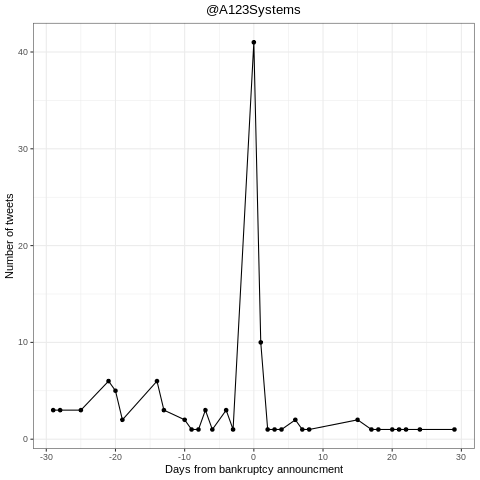

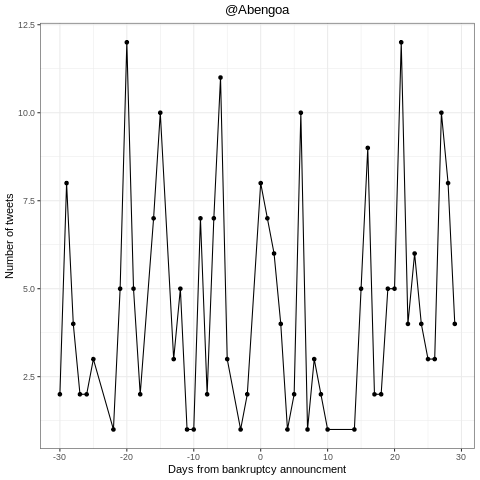

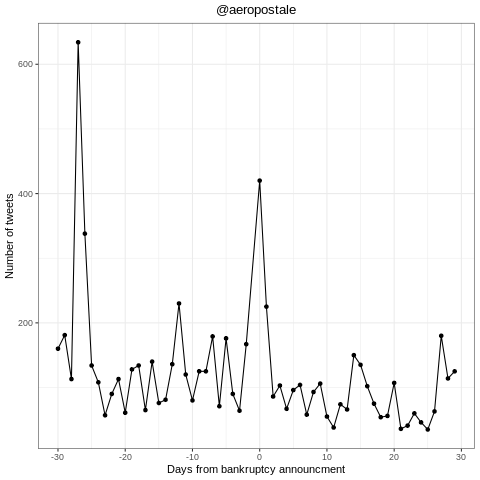

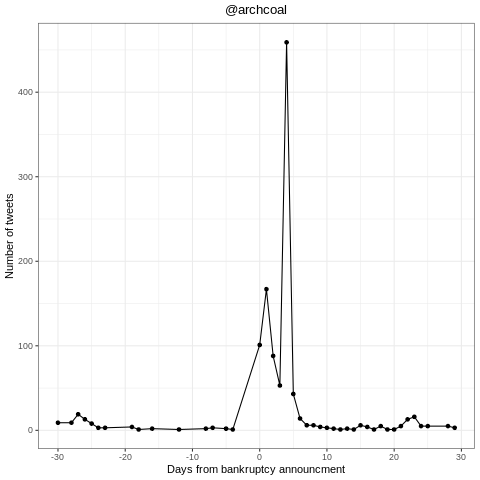

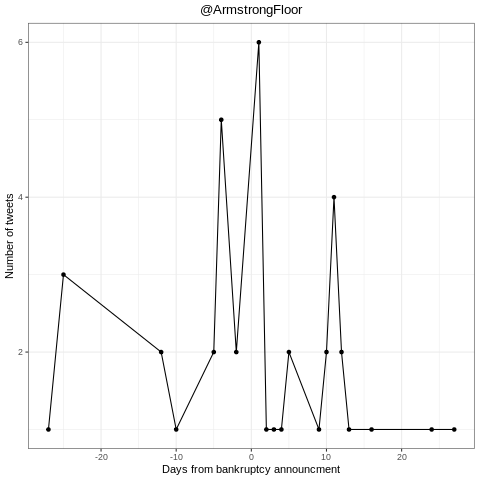

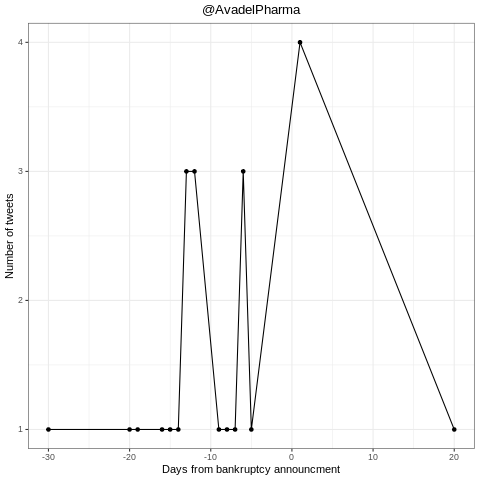

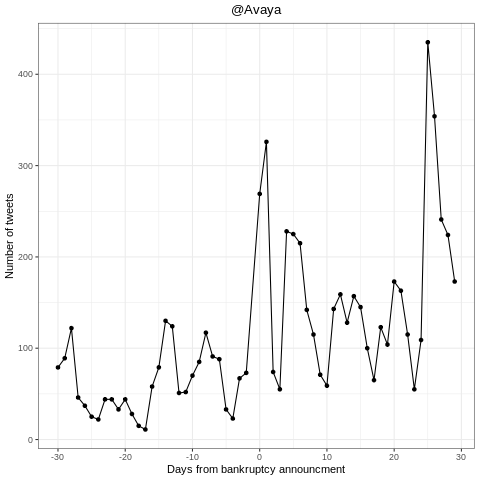

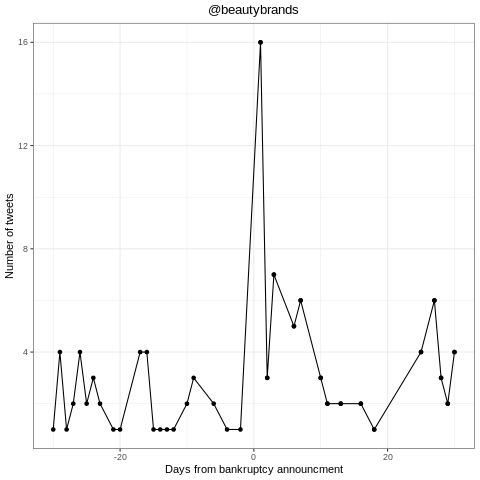

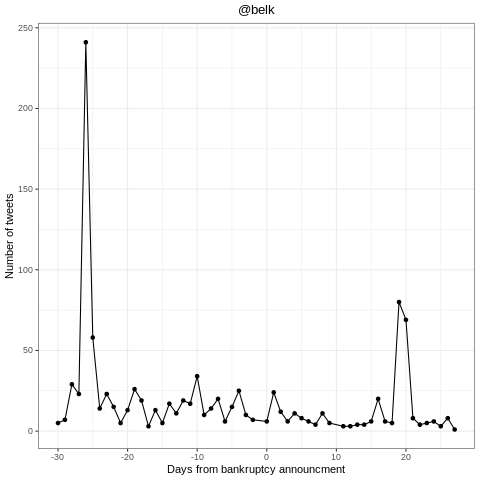

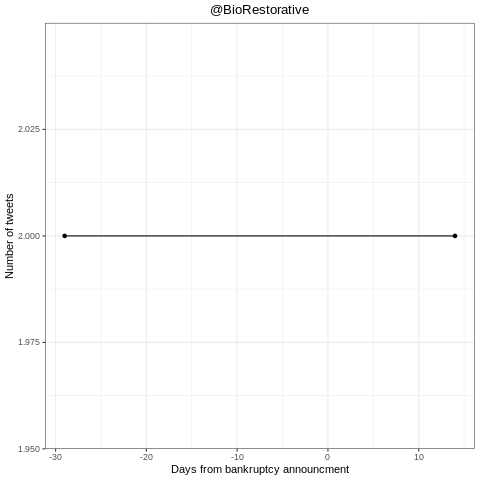

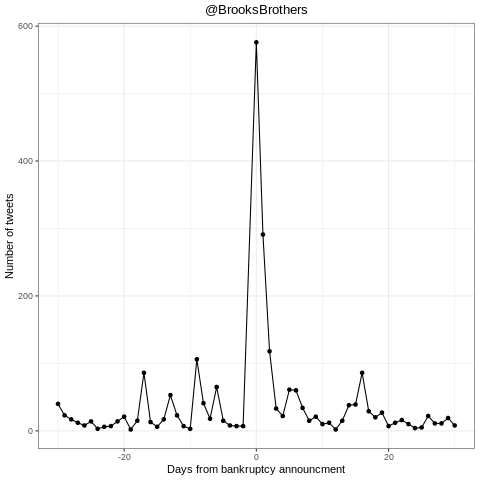

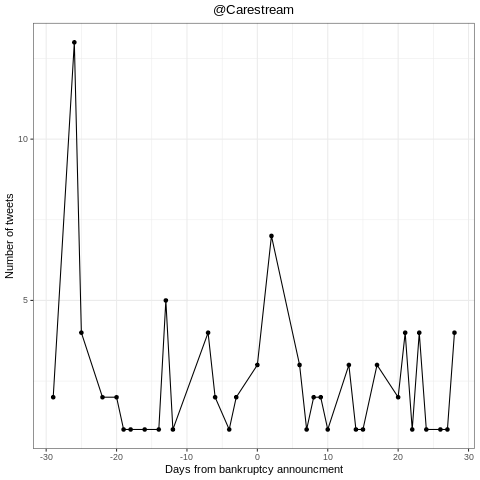

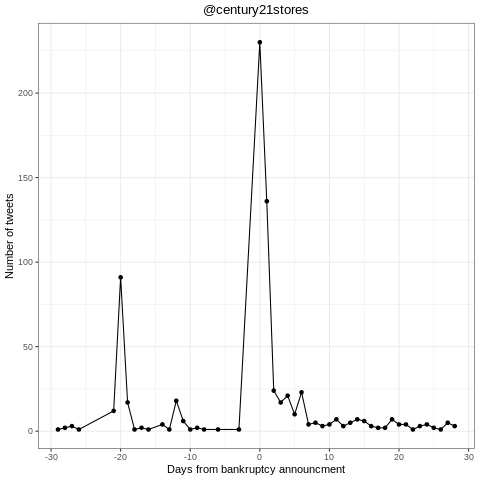

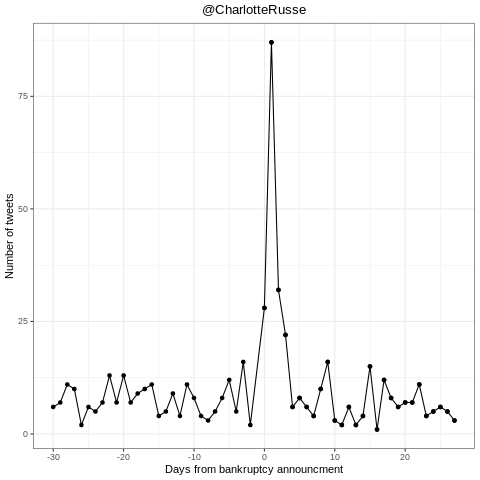

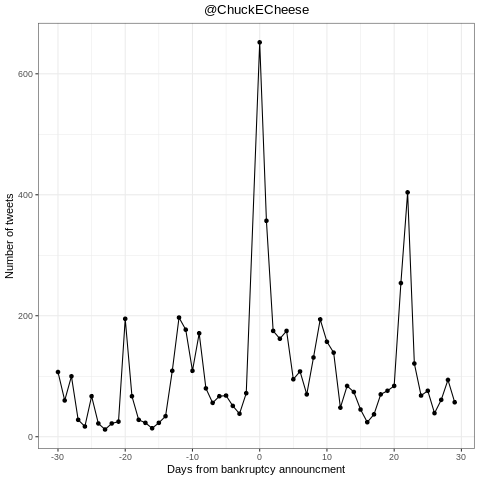

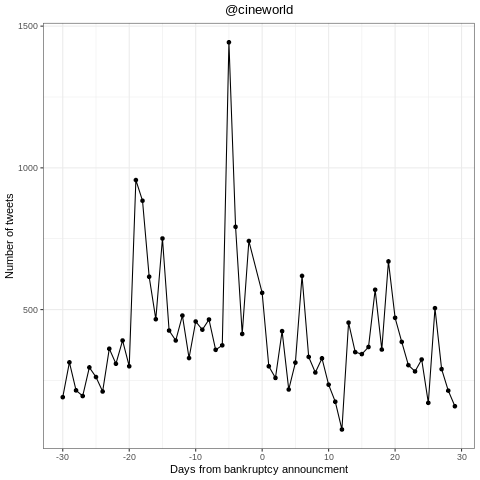

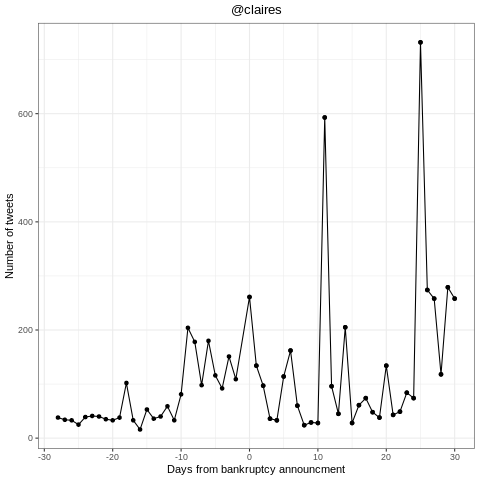

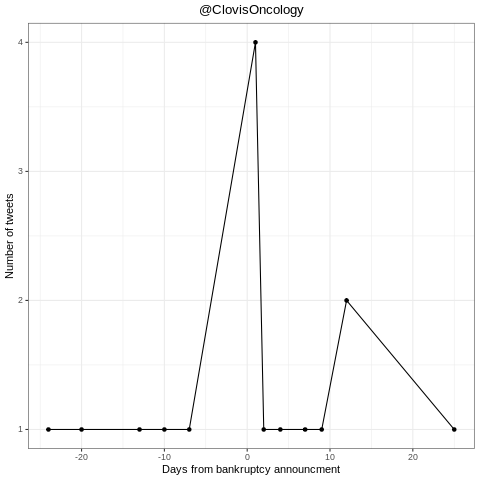

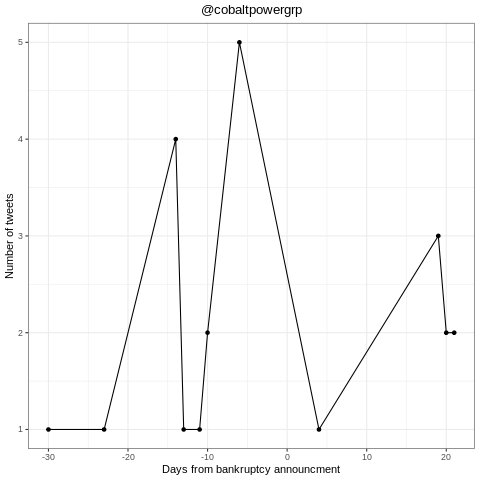

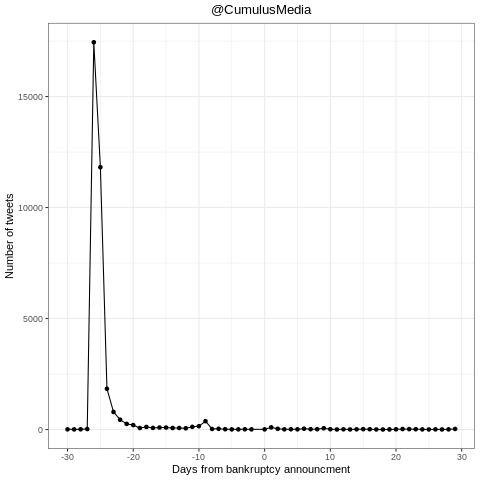

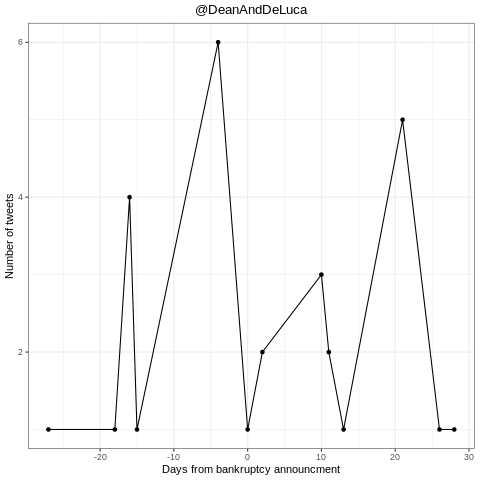

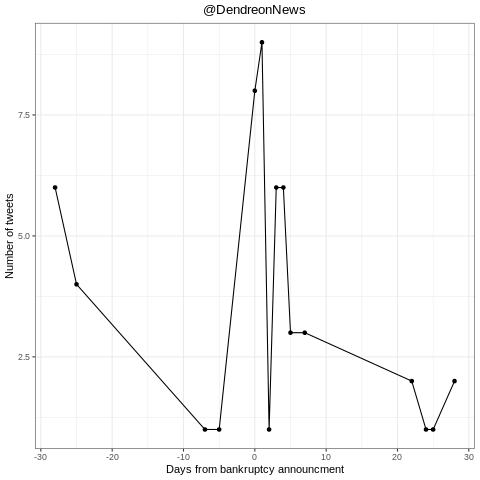

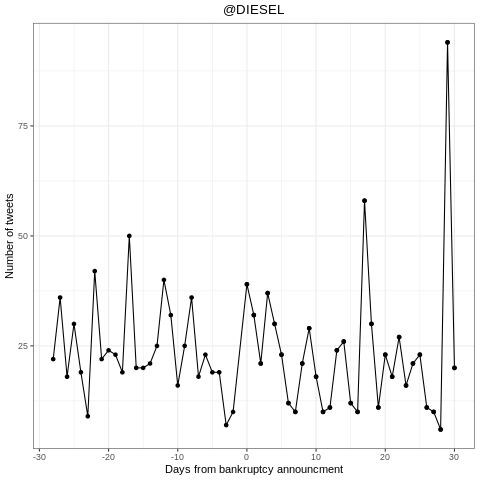

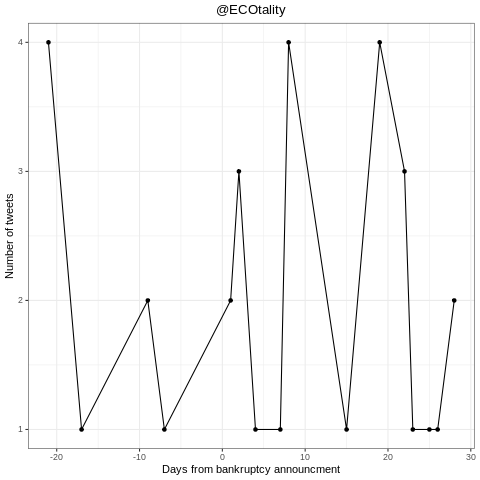

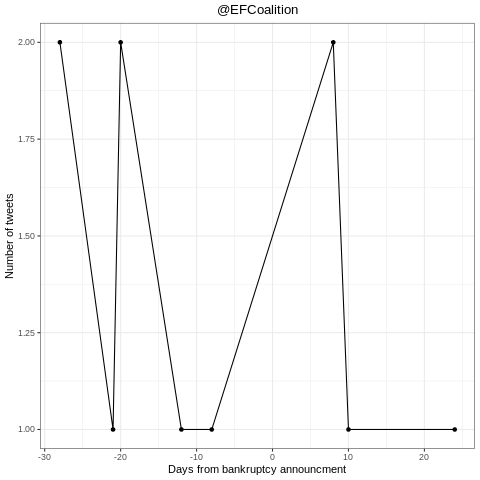

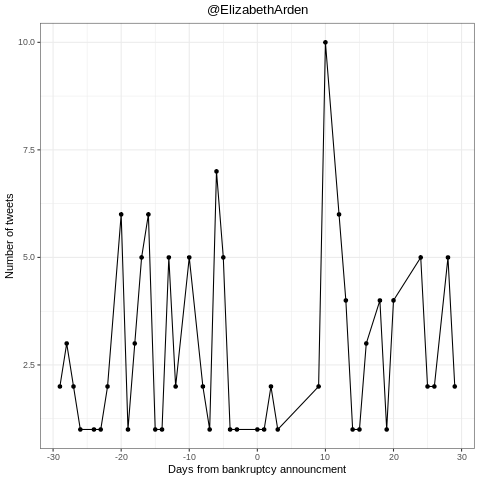

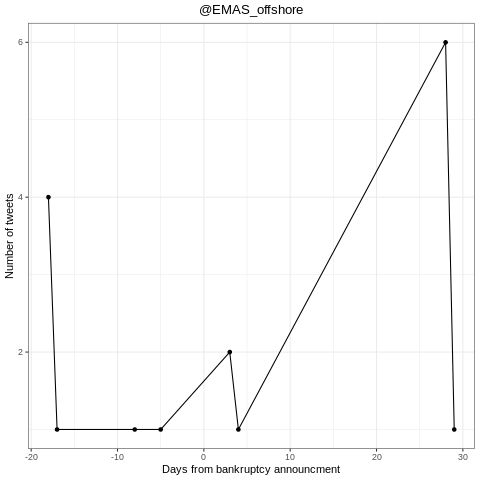

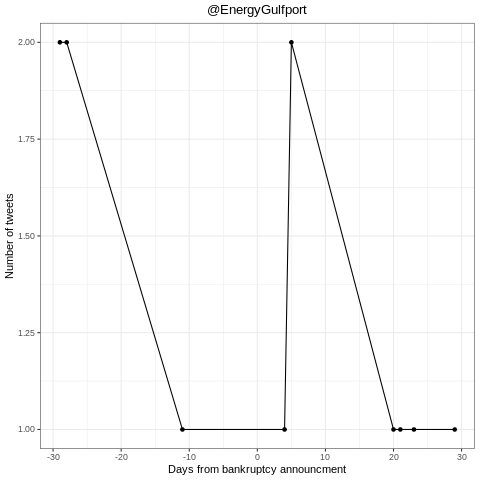

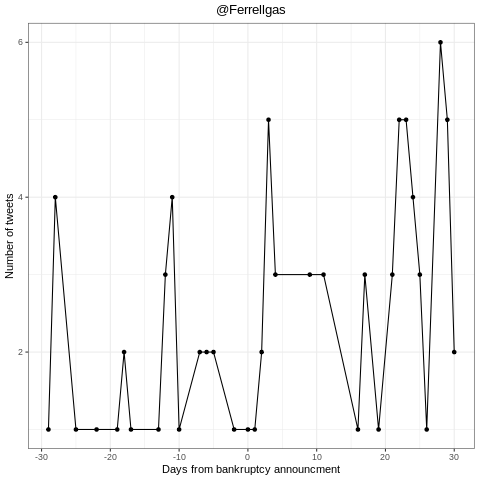

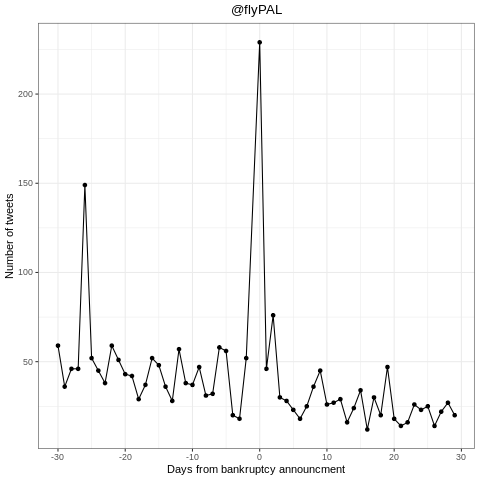

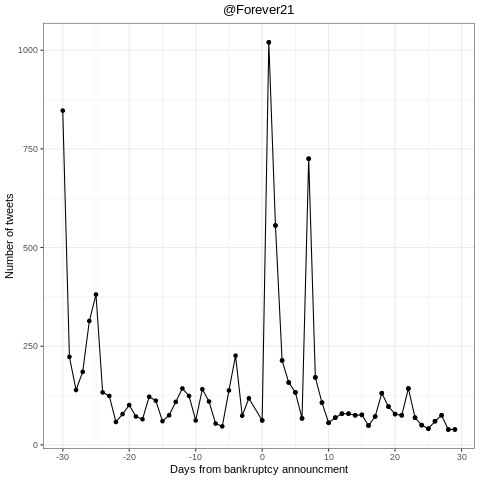

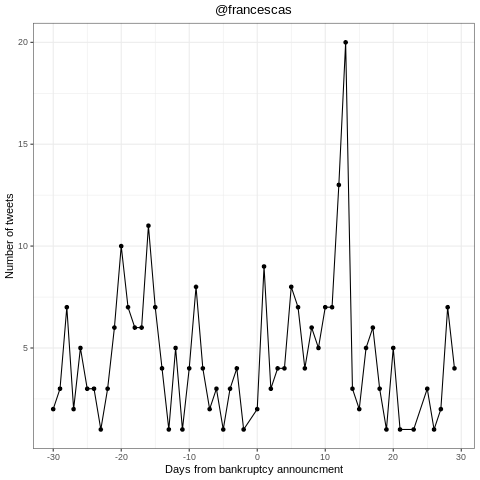

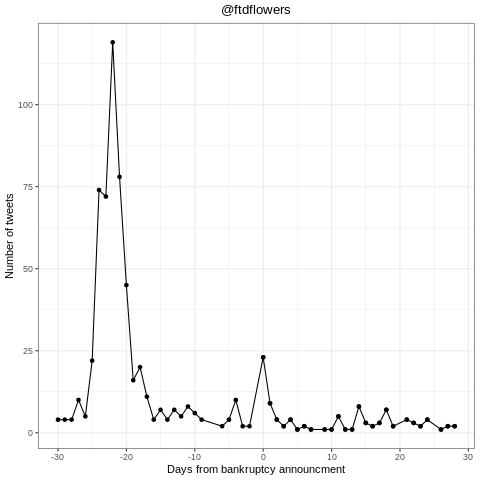

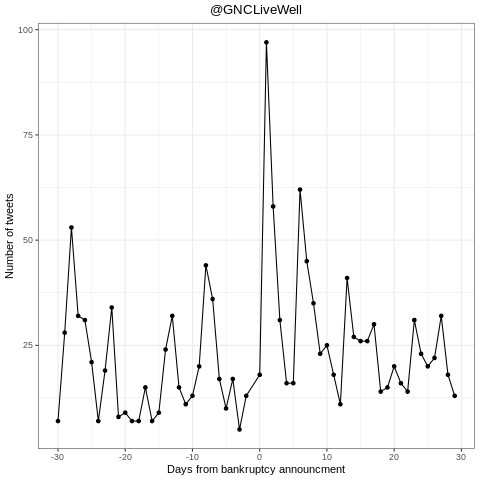

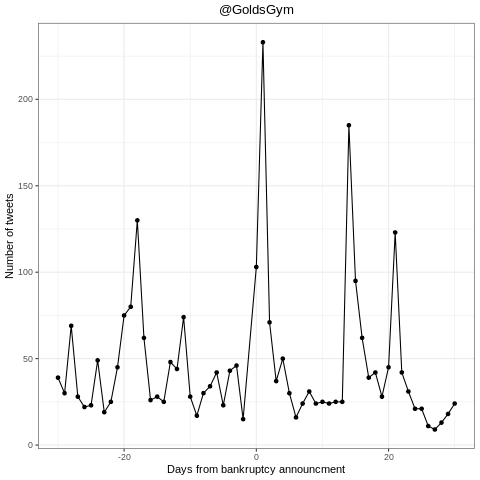

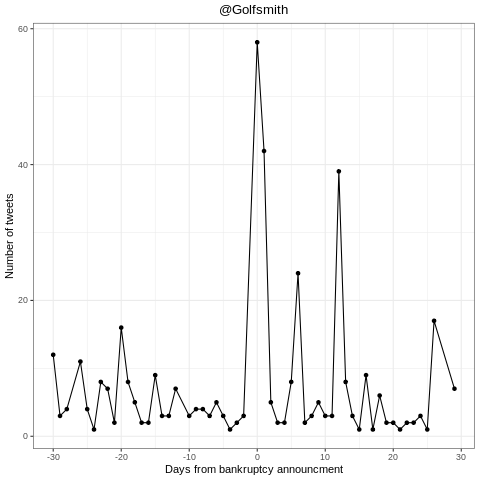

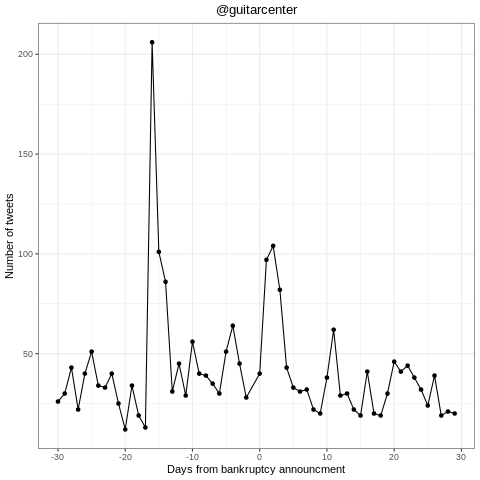

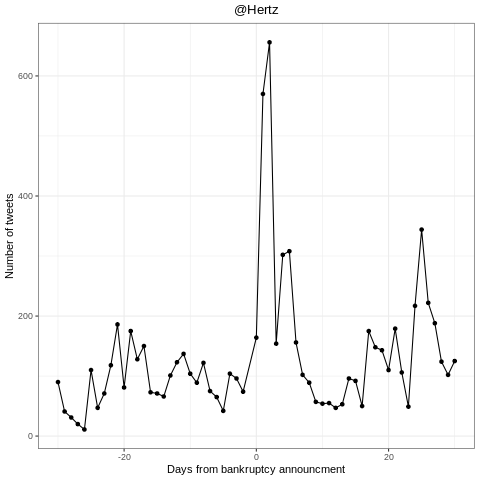

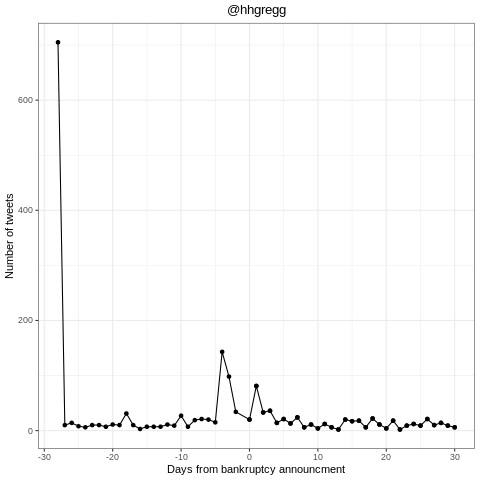

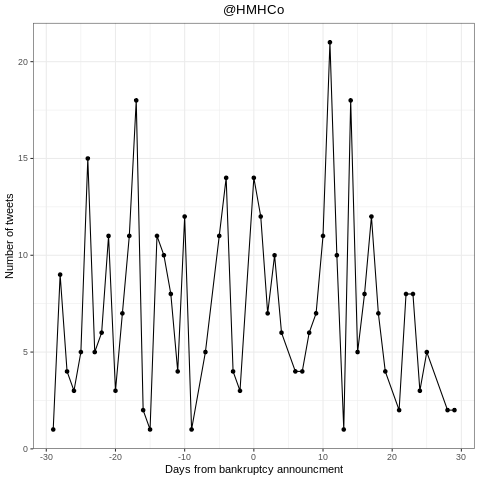

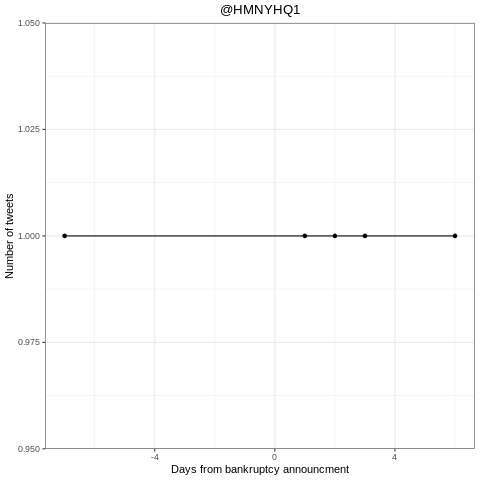

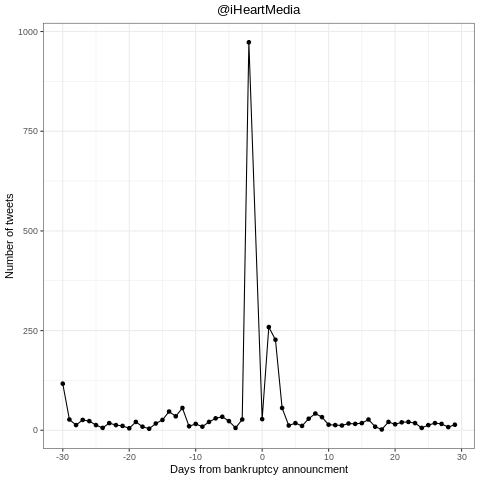

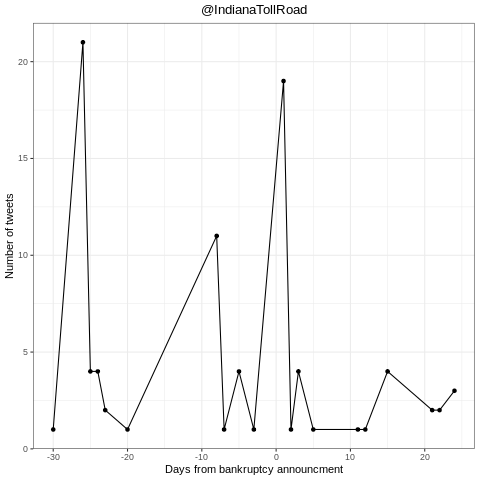

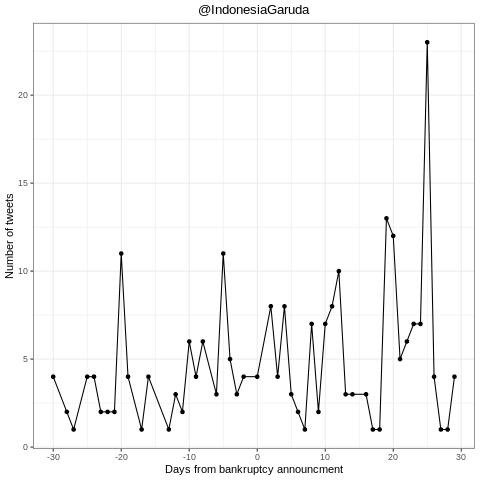

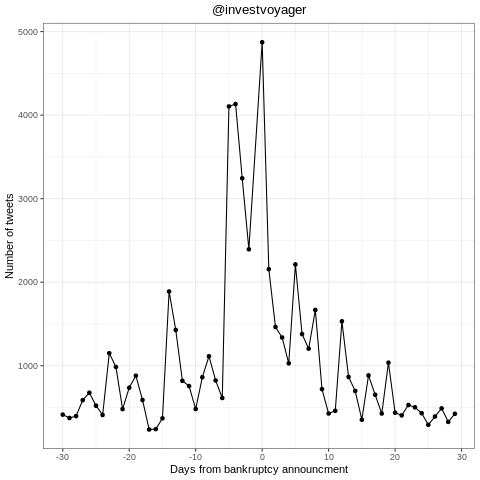

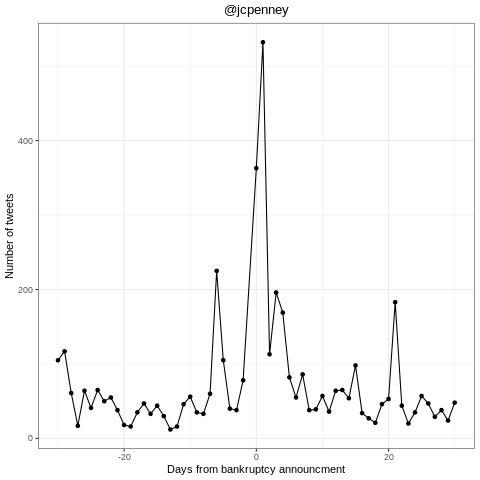

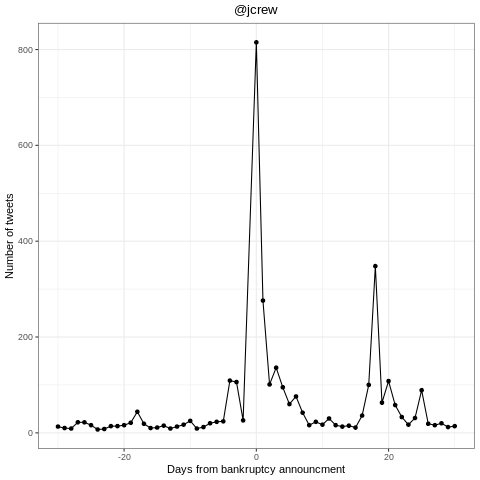

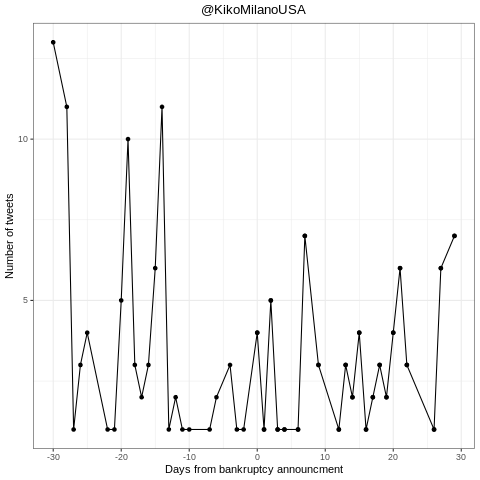

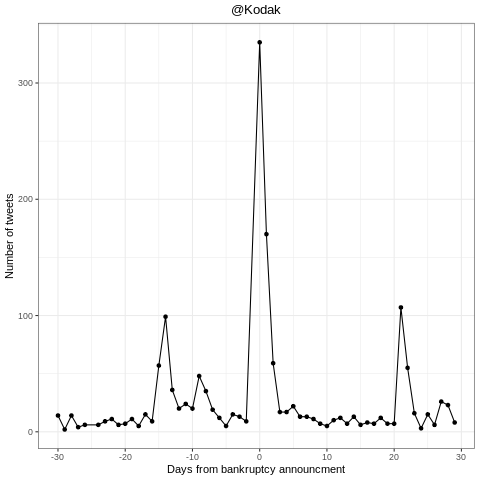

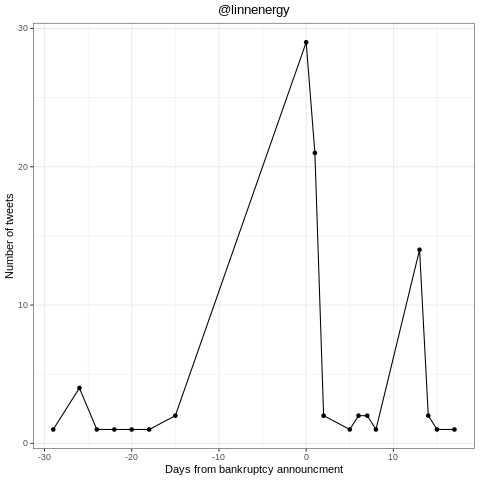

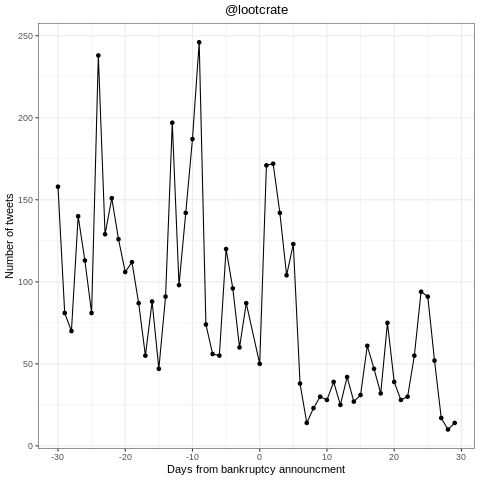

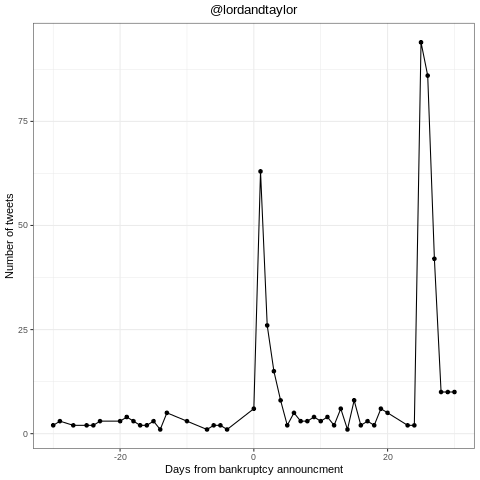

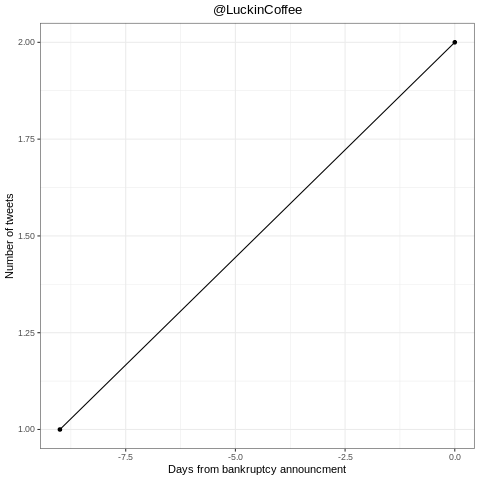

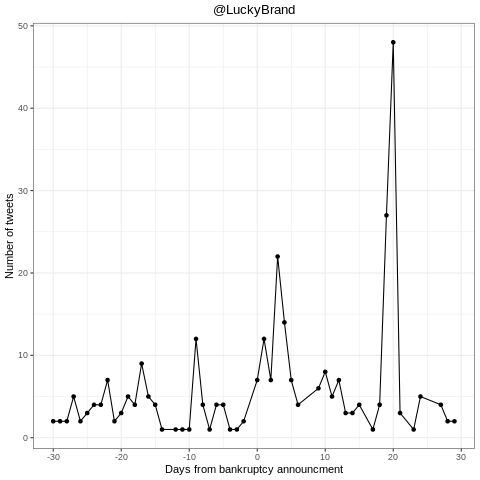

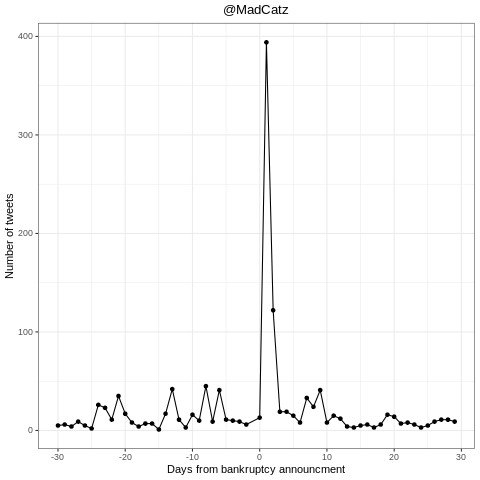

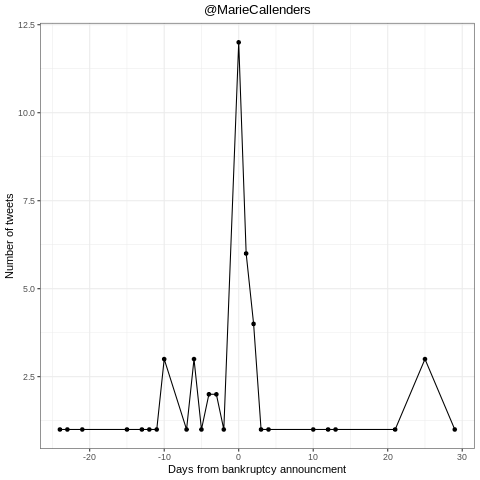

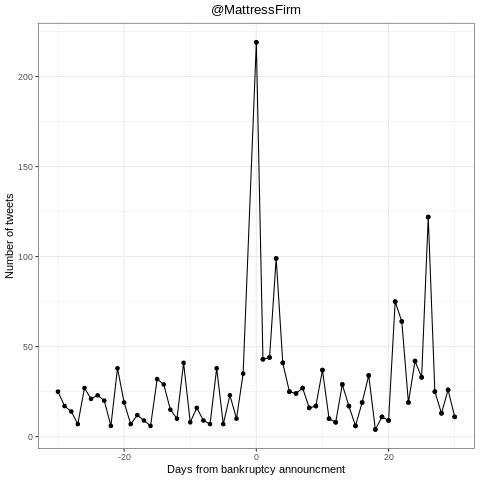

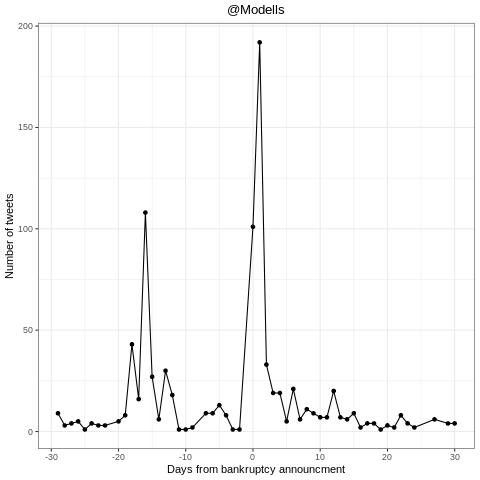

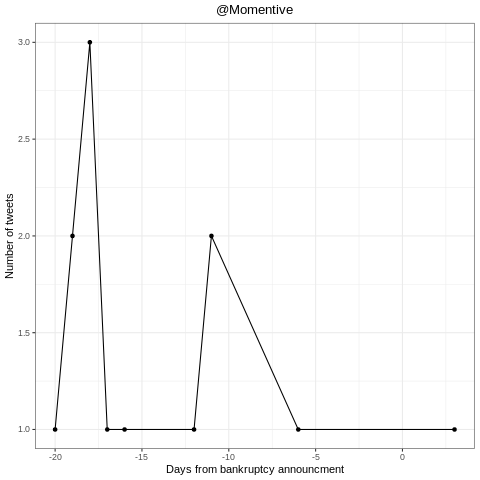

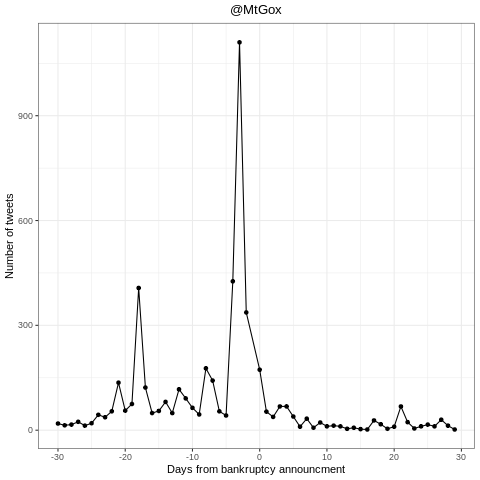

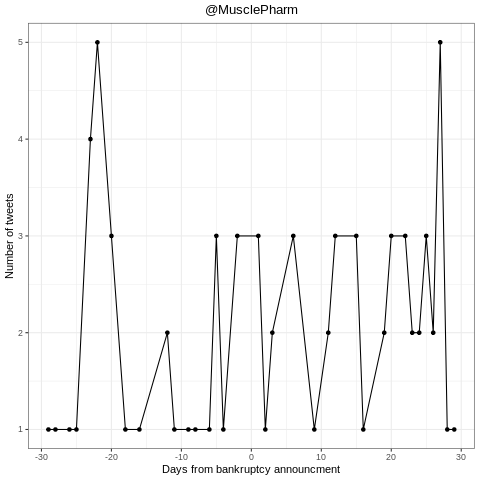

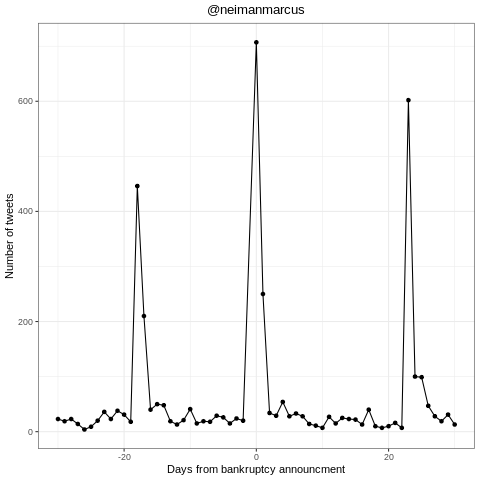

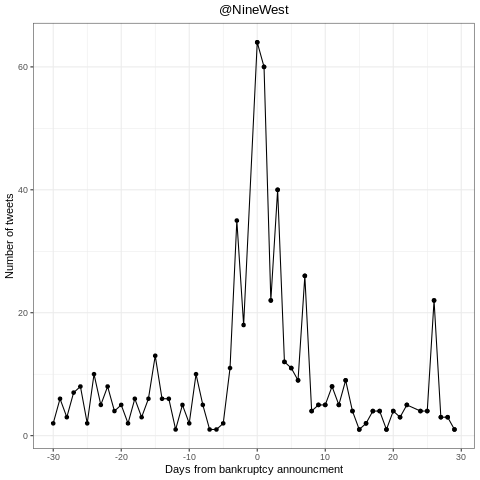

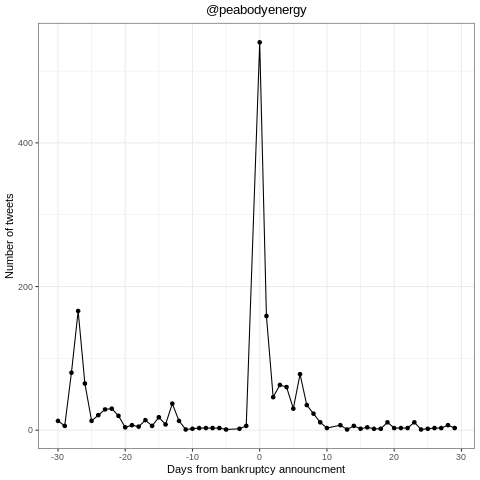

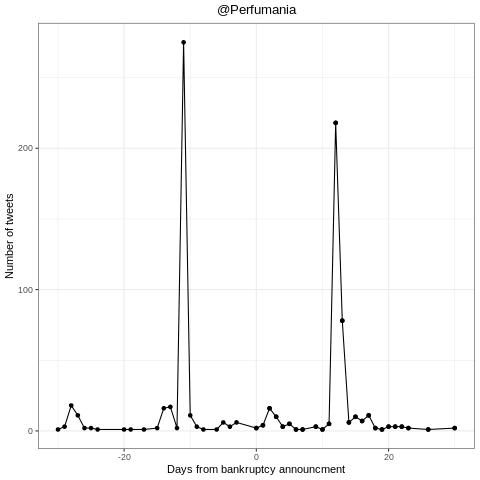

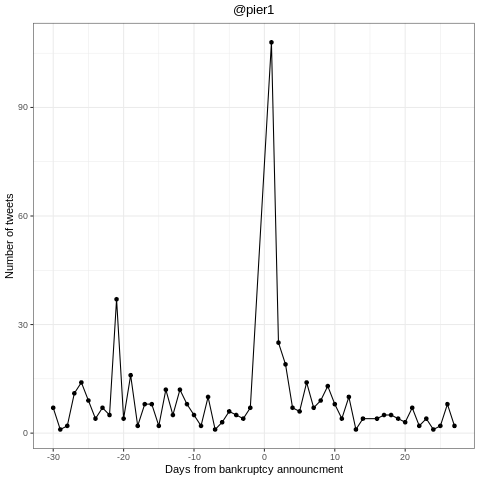

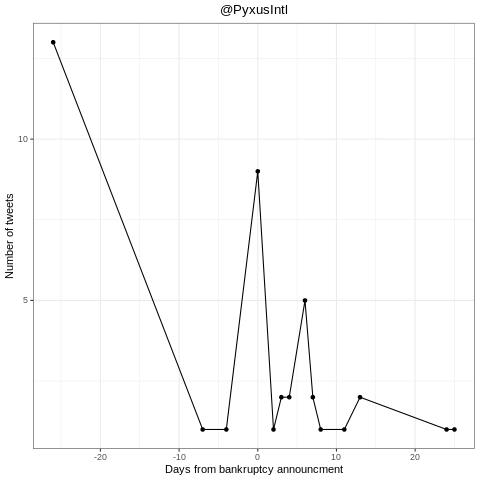

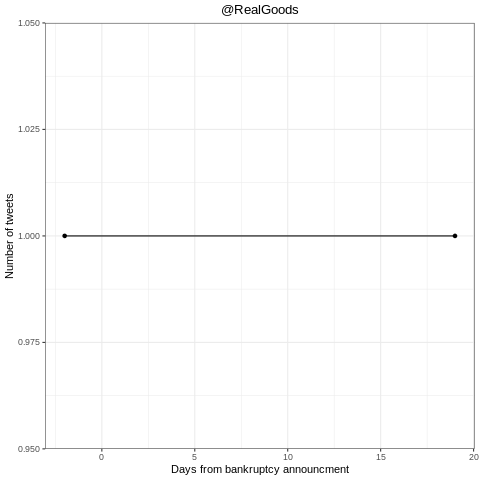

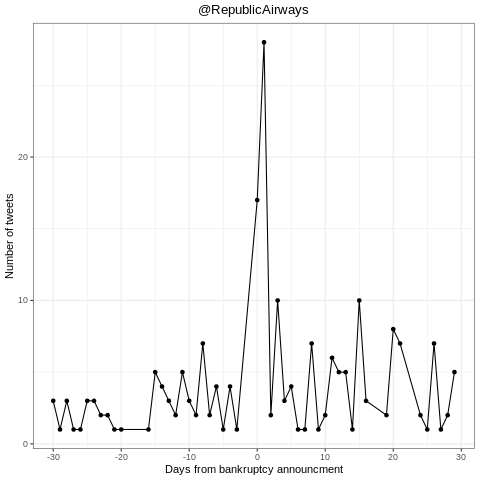

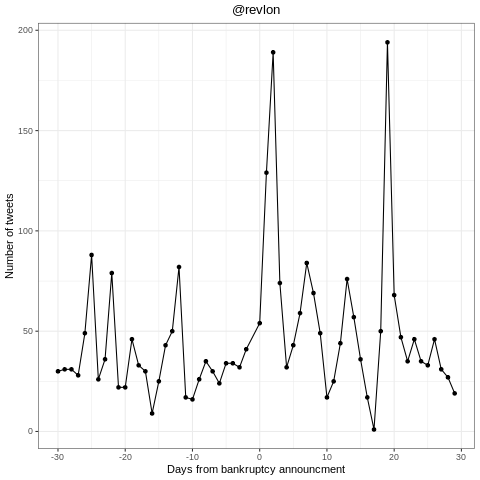

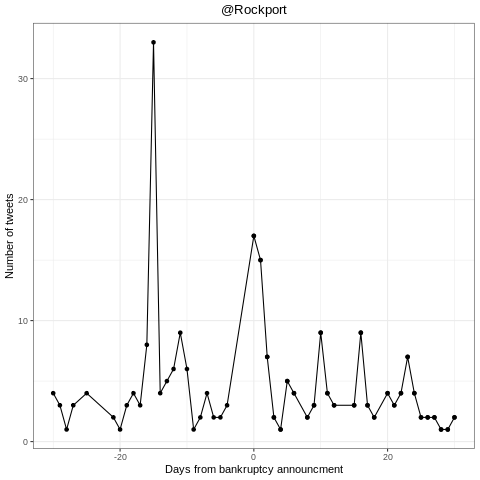

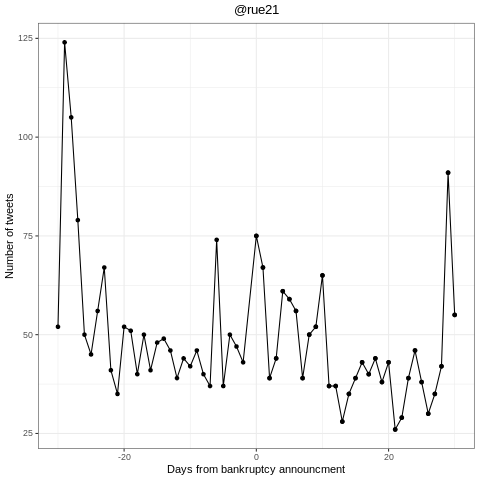

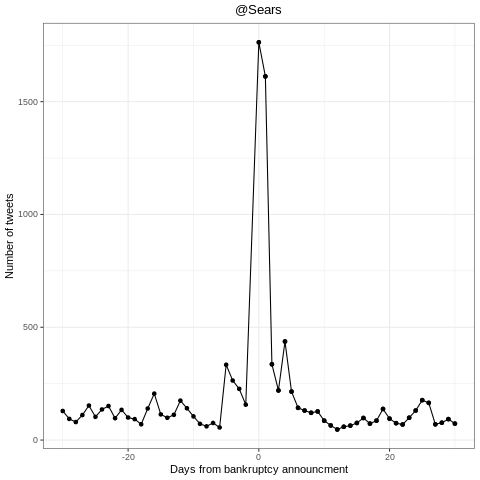

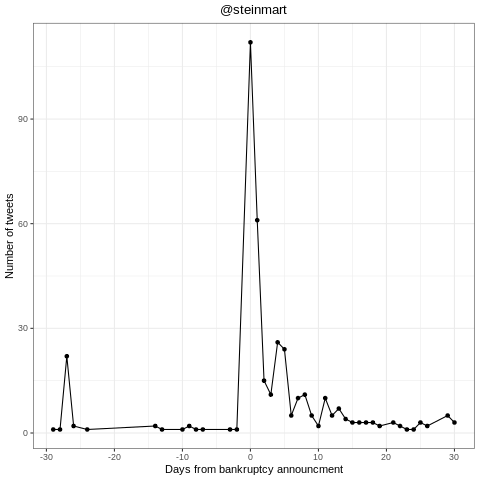

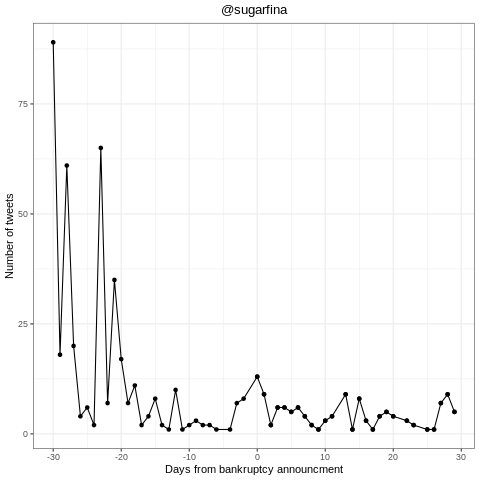

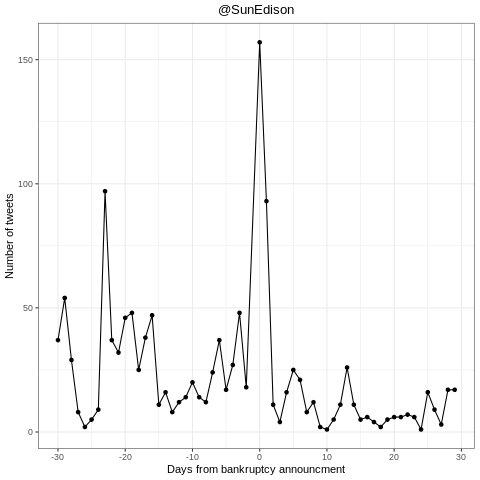

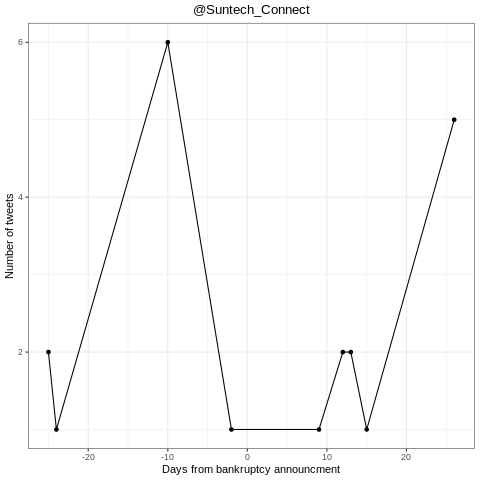

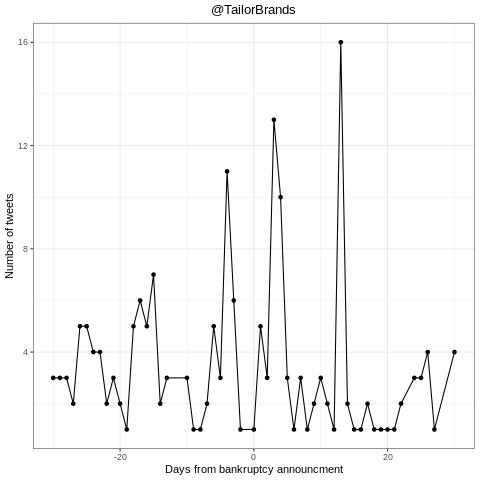

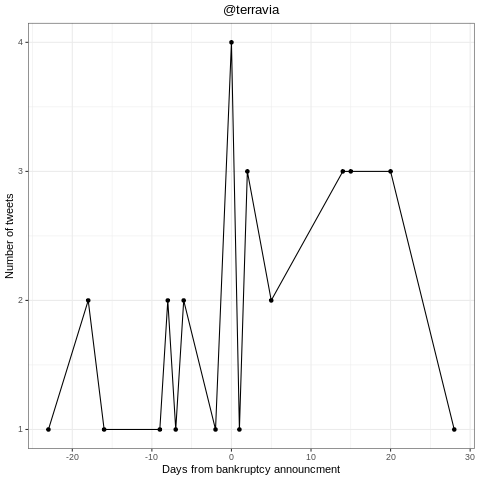

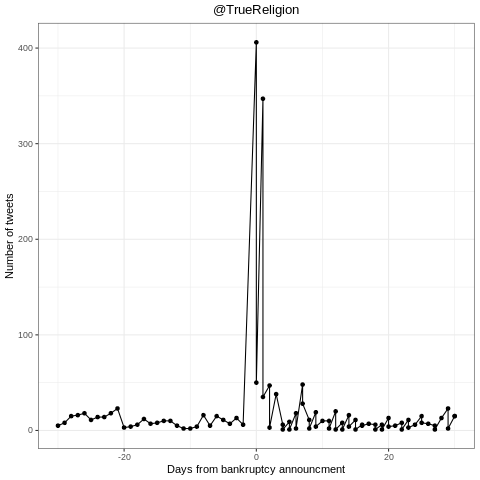

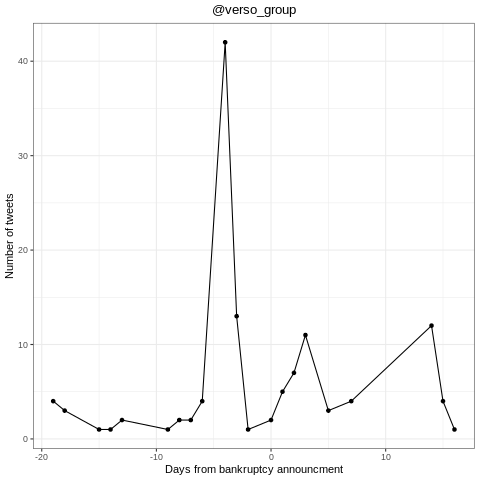

In [ ]:
%%R
# create a list of ggplots

figures <- list()
i = 1

tmp$number <- as.numeric(tmp$number)
tmp$freq <- as.numeric(tmp$freq)

for(comp in unique(tmp$company)){
  figures[[i]] <- ggplot(data=tmp[tmp$company==comp,], aes(x=number, y=freq)) +
                      geom_line()+
                      theme_bw() +
                      labs(x="Days from bankruptcy announcment", y = "Number of tweets")+
                      ggtitle(paste0("@",comp)) +
                      theme(plot.title = element_text(hjust = 0.5)) +
                      geom_point()

  plot(figures[[i]])
  i = i +1
}

[1] 1


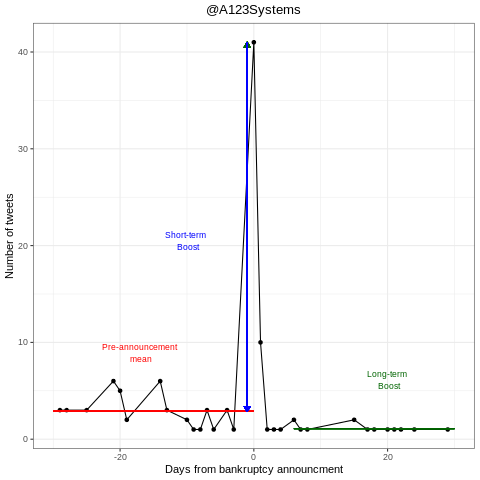

In [ ]:
%%R

comp <- 'A123Systems'
PAM <- mean(tmp[tmp$company== comp & tmp$number < 0,'freq'])
LTB <- mean(tmp[tmp$company== comp & tmp$number > 6,'freq'])

sz <- 3

i <- which(comp == unique(tmp$company))

print(i)

p1 <- figures[[i]] +  geom_text(aes(x = -17, y = PAM+6, label = "Pre-announcement \n mean"), size = sz, color="red", check_overlap = TRUE) + 
                                  geom_segment(aes(x = -30, y = PAM, xend = 0, yend = PAM), color = "red") +
                                  geom_segment(aes(x = -1, y = PAM, xend = -1, yend = tmp[tmp$company== comp & tmp$number == 0,'freq']), color = "darkgreen", arrow = arrow(length = unit(0.2, "cm"), type = "closed")) +
                                  geom_segment(aes(x = -1, y = tmp[tmp$company== comp & tmp$number == 0,'freq'], xend = -1, yend = PAM), color = "Blue", arrow = arrow(length = unit(0.2, "cm"), type = "closed")) +
                                  geom_text(aes(x = -10, y = tmp[tmp$company== comp & tmp$number == 0,'freq']/2, label = "Short-term \n Boost"), size = sz, color="Blue", check_overlap = TRUE) +
                                  geom_segment(aes(x = 6, y = LTB, xend = 30, yend = LTB), color = "Darkgreen") +
                                  geom_text(aes(x = 20, y = LTB+5, label = "Long-term \n Boost"), size = sz, color="Darkgreen", check_overlap = TRUE) 

p1

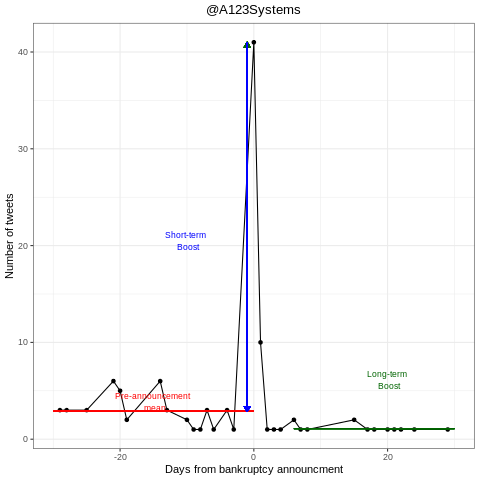

In [ ]:
%%R
p1

[1] 44


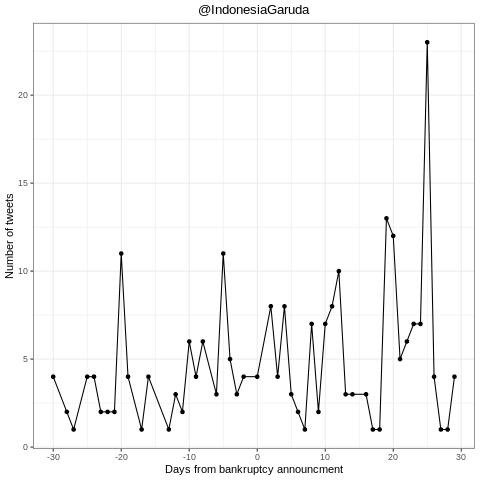

In [ ]:
%%R
# forgotten: A123Systems, SunEdison, ftdflowers, lootcrate
# unforgotten: Avaya, ChuckECheese ,GoldsGym, Hertz, MattressFirm, cineworld,claires,revlon,rue21
# IndonesiaGaruda, KikoMilanoUSA, LuckyBrand,NineWest, RepublicAirways, Rockport, TailorBrands, beautybrands, lordandtaylor,Abengoa,DIESEL,Golfsmith HMHCo

#
comp <- 'IndonesiaGaruda'
i <- which(comp == unique(tmp$company))
print(i)
figures[[i]]

In [ ]:
%%R 
unique(tmp$company)

 [1] "A123Systems"     "Abengoa"         "aeropostale"     "archcoal"       
 [5] "ArmstrongFloor"  "AvadelPharma"    "Avaya"           "beautybrands"   
 [9] "belk"            "BioRestorative"  "BrooksBrothers"  "Carestream"     
[13] "century21stores" "CharlotteRusse"  "ChuckECheese"    "cineworld"      
[17] "claires"         "ClovisOncology"  "cobaltpowergrp"  "CumulusMedia"   
[21] "DeanAndDeLuca"   "DendreonNews"    "DIESEL"          "ECOtality"      
[25] "EFCoalition"     "ElizabethArden"  "EMAS_offshore"   "EnergyGulfport" 
[29] "Ferrellgas"      "flyPAL"          "Forever21"       "francescas"     
[33] "ftdflowers"      "GNCLiveWell"     "GoldsGym"        "Golfsmith"      
[37] "guitarcenter"    "Hertz"           "hhgregg"         "HMHCo"          
[41] "HMNYHQ1"         "iHeartMedia"     "IndianaTollRoad" "IndonesiaGaruda"
[45] "investvoyager"   "jcpenney"        "jcrew"           "KikoMilanoUSA"  
[49] "Kodak"           "linnenergy"      "lootcrate"       "lordandtaylor"  

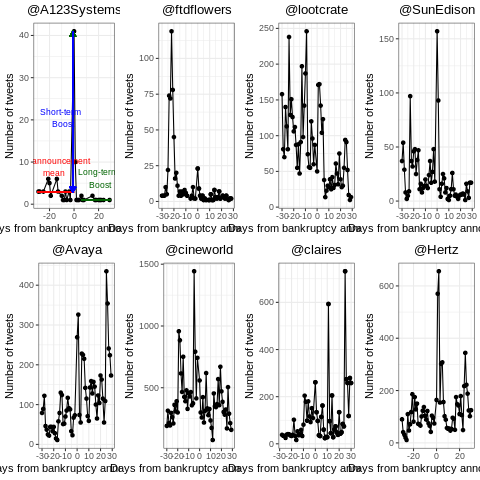

In [ ]:
%%R

# plot the figures

p<-ggarrange(p1,
             figures[[33]],
             figures[[51]],
             figures[[76]],
             figures[[7]], # unforgotten: cineworld, Hertz ,Avaya, claires
             figures[[16]],
             figures[[17]],
             figures[[38]],
          ncol = 4, nrow = 2)
options(repr.plot.width = 12, repr.plot.height = 6) # set canvas size
print(p)
ggexport(p, filename = "spikes.pdf", width = 12, height = 6) # write figure to pdf

#### plot average number of tweets before vs. after the announcement for all companies

In [ ]:
%%R
# average number of tweets before and after the announcement
fig2 <- sqldf("select number, avg(freq) as n_d from tmp group by number",method = "name__class")
write.csv(fig2, file="fig2.csv")

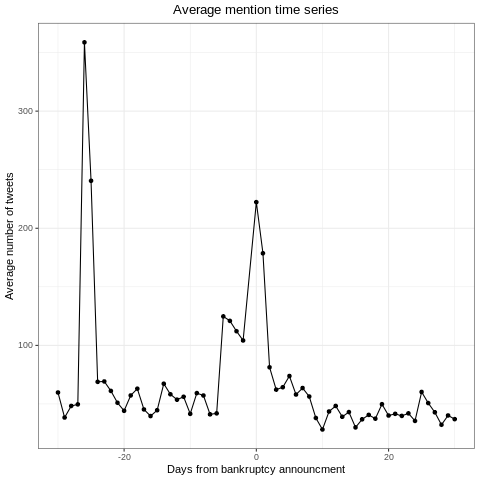

In [ ]:
%%R
p2<-ggplot(data=fig2, aes(x=number, y=n_d)) +
                      geom_line()+
                      #scale_y_continuous(trans='log10')+
                      theme_bw() +
                      labs(x="Days from bankruptcy announcment", y = "Average number of tweets")+
                      ggtitle("Average mention time series") +
                      theme(plot.title = element_text(hjust = 0.5)) +
                      #geom_hline(yintercept=mean(fig2[fig2$number!=0,]$n_d), linetype="dashed", color = "red") +
                      geom_point()

print(p2)

ggexport(p2, filename = "figures3.pdf", width = 6, height = 6) # write figure to pdf

# Fig. 3 Proportion of cultural vs. communicative memory

Proportion of cultural vs. communicative memory. On day t after death, the
total collective memory according to the shifted power law fit is S(t) = u(t) + v(t), where u(t) = at−b
is the
communicative memory, and v(t) = c is the cultural memory. We plot the proportion v(t)/S(t) as a function
of t. Left: news. Right: Twitter.

## clustering

In [ ]:
%%R
df_four_measures = data.frame(
                              'Pre_announcement_mean' = Pre_announcement_mean$avgfreq, 
                              'Short_term_boost' = Short_term_boost$shrt_boost,
                              'Long_term_boost' = Long_term_boost$lng_boost,
                              'Halving' = as.numeric(halving$halving)
                              )

df_four_measures

   Pre_announcement_mean Short_term_boost Long_term_boost Halving
1               7.633333      79.36666667        6.523810       7
2               1.941176       0.05882353        1.375000       5
3              23.888889      15.11111111       22.458333       5
4             172.766667     847.23333333      106.739130      21
5              18.344828     201.65517241       28.291667      17
6               6.633333      57.36666667        5.772727       7
7              16.782609      -0.78260870       19.833333      14
8               4.913043      12.08695652        3.500000       9
9             130.689655    1632.31034483       95.625000      14
10              9.827586     384.17241379       12.208333       5
11              1.954545      14.04545455        3.181818      12
12             71.740741     189.25925926      151.333333      11
13             19.857143       3.14285714        2.789474      15
14             46.666667      34.33333333       11.375000       4
15        

In [ ]:
%%R
mat = as.matrix(df_four_measures)

In [ ]:
%%R

res<-NbClust(mat, distance = "euclidean", min.nc=2, max.nc=10, method = "kmeans", index = "all")

# plot
library("factoextra")
fviz_nbclust(res)

In [ ]:
%%R
# do k-means
kmeans_fancy <- kmeans(scale(mat), 2, nstart = 100)


df_four_measures$company <- halving$company
df_four_measures$kmeans <- kmeans_fancy$cluster
df_four_measures

   Pre_announcement_mean Short_term_boost Long_term_boost Halving
1               7.633333      79.36666667        6.523810       7
2               1.941176       0.05882353        1.375000       5
3              23.888889      15.11111111       22.458333       5
4             172.766667     847.23333333      106.739130      21
5              18.344828     201.65517241       28.291667      17
6               6.633333      57.36666667        5.772727       7
7              16.782609      -0.78260870       19.833333      14
8               4.913043      12.08695652        3.500000       9
9             130.689655    1632.31034483       95.625000      14
10              9.827586     384.17241379       12.208333       5
11              1.954545      14.04545455        3.181818      12
12             71.740741     189.25925926      151.333333      11
13             19.857143       3.14285714        2.789474      15
14             46.666667      34.33333333       11.375000       4
15        

R[write to console]: file saved to figures3c.pdf



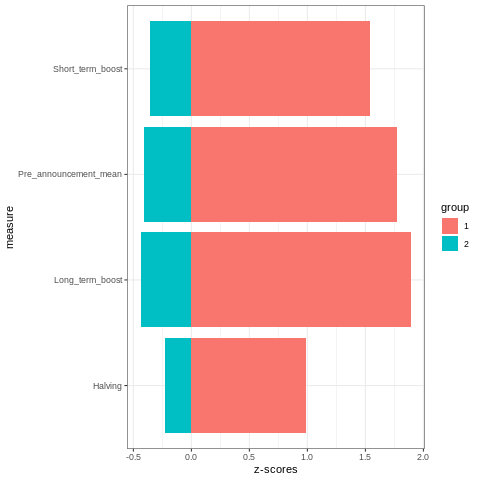

In [ ]:
%%R
df_centroids = data.frame(kmeans_fancy$centers)
df_centroids <- t(df_centroids)
df_centroids <- data.frame(df_centroids)
df_centroids$measure<-row.names(df_centroids)
row.names(df_centroids)<-NULL

one <- data.frame(df_centroids[,c(1,3)])
one$group<-"1"
names(one)[1]<-"z-scores"
two <- data.frame(df_centroids[,c(2,3)])
two$group<-'2'
names(two)[1]<-"z-scores"

df_centroids<-rbind(one, two)

# do k-means
g<- ggplot(df_centroids, aes(measure,`z-scores`,fill=group)) +
  geom_col()+
  theme_bw() +
  coord_flip()

print(g)
ggexport(g, filename = "figures3c.pdf", width = 4, height = 4) # write figure to pdf

In [ ]:
%%R
df_four_measures

## figure 3. average mention time series by group

In [ ]:
%%R
tmp <- read_csv("/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/data_rebuttle.csv", show_col_types = FALSE)

# remove TailorBrands
tmp <- tmp[!tmp$company %in% c('KikoMilanoUSA', ''),]

head(tmp[tmp$when == 'after',])

In [ ]:
%%R
group1<-tmp[tmp$company %in% df_four_measures[df_four_measures$kmeans==1,]$company,]
group1$group<-'C1'
group2<-tmp[tmp$company %in% df_four_measures[df_four_measures$kmeans==2,]$company,]
group2$group<-'C2'
group_data <- rbind(group1,group2)
fig3b <- sqldf("select number, `group`, avg(freq) as n_d from group_data group by number, `group`")
fig3b$group <- as.factor(fig3b$group)
head(fig3b)

  number group       n_d
1    -31    C2 126.28571
2    -30    C1  14.50000
3    -30    C2 103.36364
4    -29    C1  10.00000
5    -29    C2  44.72727
6    -28    C1  17.66667


R[write to console]: file saved to figures3b.pdf



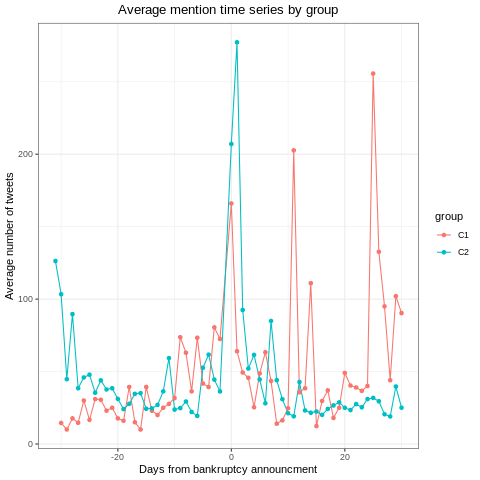

In [ ]:
%%R
p2<-ggplot(data=fig3b, aes(x=number, y=n_d, group=group, colour=group)) +
                      geom_line()+
                      theme_bw() +
                      labs(x="Days from bankruptcy announcment", y = "Average number of tweets")+
                      ggtitle("Average mention time series by group") +
                      theme(plot.title = element_text(hjust = 0.5)) +
                      geom_point()

print(p2)

ggexport(p2, filename = "figures3b.pdf", width = 6, height = 6) # write figure to pdf

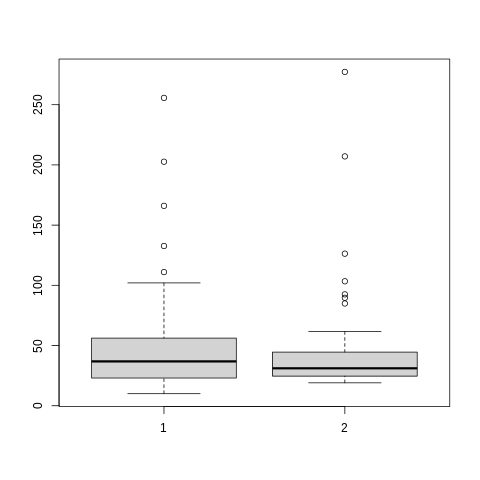

In [ ]:
%%R
boxplot(fig3b[fig3b$group=='C1',]$n_d, fig3b[fig3b$group=='C2',]$n_d)

In [ ]:
%%R
# mean of 3 out of the 4 parameters in each cluster
# mean(df_four_measures$Short_term_boost

#mean(df_four_measures[df_four_measures$kmeans=='1',]$Short_term_boost)
mean(df_four_measures[df_four_measures$kmeans=='2',]$Short_term_boost)

# Short_term_boost      C1: 617.7155           C2: 107.0955            ALL  298.578
# Long_term_boost       C1: 70.03487           C2 15.3411              ALL  35.85126
# Pre_announcement_mean C1: 51.11              C2 16.80455             ALL  29.67202

[1] 62.94734


## regression

1. Pre-announcement mean mention frequency.
2. Company age (year) at the day of bankruptcy announcement.
3. Bankruptcy strategy (factor with 5 levels: restructuring, reorganization, purchased, sold, closed all stores).
4. Market cup category (factor with 6 levels: specifying the main business of the company: sports, clothes, etc.
5. Market capitalization.
6. Gender of owners (factor with 3 levels: female, male, mixed).




In [ ]:
%%R
Pre_announcement_mean$avgfreq<-scale(Pre_announcement_mean$avgfreq)
Pre_announcement_mean

      avgfreq         company
1  -0.6115239  CharlotteRusse
2  -0.7271324 CharmingCharlie
3  -0.2813710          DIESEL
4   2.7423597       Forever21
5  -0.3939717    MattressFirm
6  -0.6318340        NineWest
7  -0.4257007      Perfumania
8  -0.6667734        Rockport
9   1.8877691           Sears
10 -0.5669582    TrueReligion
11 -0.7268609    beautybrands
12  0.6905075         claires
13 -0.3632564      ftdflowers
14  0.1812492         hhgregg
15  0.3049777           rue21
16 -0.4114805       sugarfina


In [ ]:
# average sentiment analysis of each company
# load before and after datasets
%%R

before <- read_csv(paste0(PTH1,"/before.csv"),col_types = cols(...1 = col_skip(), id = col_character(),
                                                                       in_reply_to_user_id = col_character(),
                                                                       author_id = col_character(), 
                                                                       conversation_id = col_character()))


before<-before[!before$company %in% c('DeanAndDeLuca', 'TailorBrands'),]

New names:
• `` -> `...1`


In [ ]:
%%R
tweets_R = before$text

In [ ]:
%R -o tweets_R tweets_R

"""There we...",'RT @Nint...,'RT @Nint...,...,'RT @hhgr...,'RT @hhgr...,"""@hhgregg..."


In [ ]:
import re
result = [re.sub(r'http\S+', '', x) for x in tweets_R]

In [ ]:
# https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
from textblob import TextBlob

sentiment = []
subjectivity = []

for text in result:
  x = TextBlob(text)
  sentiment.append( x.sentiment[0] )
  subjectivity.append( x.sentiment[1] ) # The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [ ]:
# send back sentiment to R
%R -i sentiment sentiment
%R -i subjectivity subjectivity

## T-tests

In [ ]:
%%R
# reputation ratio
cl1=c(36.01754386,
56.8627451,
132.7731092,
146.4516129,
162.406015,
67700)


cl2=c(49.26624738,
85.17520216,
111.9669421,
113.8297872,
117.0572207,
144.9460647,
169.4719472,
203.6018957,
311.2852665,
74100)


wilcox.test(cl1,cl2)


	Wilcoxon rank sum exact test

data:  cl1 and cl2
W = 27, p-value = 0.7925
alternative hypothesis: true location shift is not equal to 0



In [ ]:
%%R
# difference in the number of Followers

cluster1=c(67700,
43200,
22700,
14500,
110600,
6159)


cluster2=c(192600,
102700,
74100,
23500,
99300,
214800,
429600,
338700,
63200,
362800)


t.test(cluster1,cluster2)


	Welch Two Sample t-test

data:  cluster1 and cluster2
t = -3.0489, df = 11.109, p-value = 0.01095
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -251248.32  -40725.35
sample estimates:
mean of x mean of y 
 44143.17 190130.00 



In [ ]:
%%R
# difference in the number of lists

clst1=c(171,
255,
833,
155,
266,
1)


clst2=c(477,
742,
3025,
1692,
1835,
2503,
606,
2110,
319,
1)


t.test(clst1,clst2)


	Welch Two Sample t-test

data:  clst1 and clst2
t = -3.0244, df = 11.129, p-value = 0.01143
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1814.4995  -287.1672
sample estimates:
mean of x mean of y 
 280.1667 1331.0000 



In [ ]:
%%R
# list into vector
sentiment = unlist(sentiment)
subjectivity = unlist(subjectivity)

In [ ]:
%%R
before$sentiment <- sentiment
before$subjectivity <- subjectivity

mean_sent_by_comp = sqldf("select avg(sentiment), company from before group by company")

mean_subj_by_comp = sqldf("select avg(subjectivity), company from before group by company")


mean_sent_by_comp<-mean_sent_by_comp[!mean_sent_by_comp$company %in% c('KikoMilanoUSA', ''),]
mean_subj_by_comp<-mean_subj_by_comp[!mean_subj_by_comp$company %in% c('KikoMilanoUSA', ''),]

In [ ]:
%%R
# number of tweets before
num_of_tweets_before = sqldf("select company, count(1) as n_tweets from before group by company")
num_of_tweets_before = num_of_tweets_before[num_of_tweets_before$company != "KikoMilanoUSA",]
num_of_tweets_before

           company n_tweets
1   CharlotteRusse      229
2  CharmingCharlie       33
3           DIESEL      645
4        Forever21     5183
6     MattressFirm      537
7         NineWest      199
8       Perfumania      386
9         Rockport      120
10           Sears     3797
11    TrueReligion      286
12    beautybrands       43
13         claires     1938
14      ftdflowers      557
15         hhgregg     1260
16           rue21     1531
17       sugarfina      507


In [ ]:
%%R
unique(before$company)

 [1] "sugarfina"       "Forever21"       "CharmingCharlie" "ftdflowers"     
 [5] "DIESEL"          "CharlotteRusse"  "beautybrands"    "Sears"          
 [9] "MattressFirm"    "Rockport"        "NineWest"        "claires"        
[13] "KikoMilanoUSA"   "Perfumania"      "TrueReligion"    "rue21"          
[17] "hhgregg"        


In [ ]:
%%R
# calculate mean inter-tweet time
inter_tweet_time = data.frame()
for(company in unique(before$company)){
    v = as.POSIXct( before[before$company==company,]$created_at , format = "%a %b %d %H:%M:%S %z %Y", tz="GMT")
    v = v[order(v , decreasing = TRUE )]
    d = diff(v)
    inter_tweet_time = rbind(inter_tweet_time, c(company, mean(d)))
}

names(inter_tweet_time) = c('company','avg_inter_time')
#inter_tweet_time = inter_tweet_time[order(num_of_tweets_before$company),]
inter_tweet_time = sqldf("select company, avg_inter_time/60 as avg_inter_time from inter_tweet_time group by company") # we do this to keep the order of companies
inter_tweet_time <- inter_tweet_time[inter_tweet_time$company != 'KikoMilanoUSA',]
inter_tweet_time

           company    avg_inter_time
1   CharlotteRusse -183.459210526315
2  CharmingCharlie -20.2715711805555
3           DIESEL -60.2850672877847
4        Forever21 -8.32957673999743
6     MattressFirm -77.8626865671642
7         NineWest -214.747643097643
8       Perfumania -106.192337662338
9         Rockport -317.968207282913
10           Sears -10.9990735862311
11    TrueReligion -142.552631578947
12    beautybrands -16.5759457671958
13         claires  -20.065969712614
14      ftdflowers -74.8082434052758
15         hhgregg -30.8718030182685
16           rue21 -27.2831045751633
17       sugarfina -84.9220355731225


In [ ]:
%%R

Company_type = c( 'Beauty',
                  'Clothing',
                  'Clothing',
                  'Department Store',
                  'Clothing',
                  'Clothing',
                  'Other',
                  'Department Store',
                  #'Beauty',
                  'Mattresses',
                  'Clothing',
                  'Beauty',
                  'Clothing',
                  'Other',
                  'Department Store',
                  'Other',
                  'Clothing'
                  )
                  
Followers = c(8403,
              72100,
              28500,
              65400,
              179000,
              1900000,
              12800,
              31800,
              #4367,
              47200,
              45400,
              19000,
              6294,
              32400,
              198100,
              22300,
              44600)


Following = c(
                707,
                9438,
                148,
                225,
                737,
                351,
                21,
                900,
                #47,
                554,
                387,
                159,
                940,
                1091,
                9293,
                172,
                193
                )

# mean web searched worldwide 1 month before the announcedment on Google Trends
Google_trends = c(
                  69.84,
                  74.9,
                  59.45,
                  35.86,
                  84.86,
                  54.93,
                  25.31,
                  50.06,
                  #
                  30.77,
                  64.93,
                  62.46,
                  87.38,
                  65.19,
                  28,
                  32.75,
                  11.51
                  )

public = c( 'Private',
            'Private',
            'Private',
            'Private',
            'Private',
            'Private',
            'Public',
            'Public',
            #'Private',
            'Private',
            'Private',
            'Public',
            'Private', 
            'Private',
            'Public',
            'Private', 
            'Private')

In [ ]:
%%R

df = data.frame(
                  'company' = Pre_announcement_mean$company,
                  'Pre_announcement_mean' = Pre_announcement_mean$avgfreq, 
                  'Company_type' = as.factor(Company_type), 
                  'Short_term_boost' = Short_term_boost$shrt_boost,
                  'Long_term_boost' = Long_term_boost$shrt_boost,
                  'avg_inter_time' = inter_tweet_time$avg_inter_time,
                  'num_of_tweets_before' = num_of_tweets_before$n_tweets,
                  'Followers' = Followers,
                  'Following' = Following,
                  'Google_trends' = Google_trends,
                  'public' = as.factor(public)
                )

In [ ]:
%%R
length(num_of_tweets_before$n_tweets)

[1] 16


In [ ]:
# *** predicct short-term boost ***
%%R

df$Company_type <- relevel(df$Company_type, ref = 'Clothing') # Clothing
df$public <- relevel(df$public, ref = 'Private')


library(MASS)
# Fit the full model 
full.model <-lm(df$Short_term_boost ~ 
                                df$Pre_announcement_mean +
                                #df$mean_sent_by_comp +
                                #df$avg_inter_time +
                                df$Company_type +
                                df$Google_trends +
                                df$num_of_tweets_before +
                                df$public
                                #+df$Followers+
                                #df$Following +
                                #df$mean_subj_by_comp
                )

# Stepwise regression model
step.model <- stepAIC(full.model, direction = "both", 
                      trace = FALSE)
summary(step.model)


Call:
lm(formula = df$Short_term_boost ~ df$Pre_announcement_mean + 
    df$Company_type + df$Google_trends + df$num_of_tweets_before + 
    df$public)

Residuals:
   Min     1Q Median     3Q    Max 
-85.76 -52.15 -17.59  12.49 252.08 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1797.9842   794.0483  -2.264  0.05796 .  
df$Pre_announcement_mean        -2244.8735  1005.6039  -2.232  0.06076 .  
df$Company_typeBeauty            -139.4301   127.4465  -1.094  0.31015    
df$Company_typeDepartment Store  -151.4306   165.2964  -0.916  0.39008    
df$Company_typeMattresses        1107.1338   181.4265   6.102  0.00049 ***
df$Company_typeOther             -122.1629    98.9935  -1.234  0.25700    
df$Google_trends                    2.6056     1.8317   1.422  0.19789    
df$num_of_tweets_before             1.7068     0.7012   2.434  0.04515 *  
df$publicPublic                   154.7660   144.9097   1.068  0.32095   

In [ ]:
# *** predict long-term boost ***
%%R
model2<-lm(log(Long_term_boost) ~     Pre_announcement_mean +
                                      #as.numeric(avg_inter_time) +
                                      Followers + 
                                      Short_term_boost,
                                    data = df
                                      )
                                      

summary(model2)


Call:
lm(formula = log(Long_term_boost) ~ Pre_announcement_mean + Followers + 
    Short_term_boost, data = df)

Residuals:
         5          7         10         11         12 
-0.0001057  0.0251870  0.0037865 -0.0231138 -0.0057540 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            2.280e+00  2.640e-02  86.370  0.00737 **
Pre_announcement_mean  2.999e+00  3.269e-02  91.756  0.00694 **
Followers              6.765e-06  2.633e-07  25.691  0.02477 * 
Short_term_boost      -6.078e-05  1.184e-04  -0.514  0.69799   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03487 on 1 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9995 
F-statistic:  2951 on 3 and 1 DF,  p-value: 0.01353



In [ ]:
%%R
(df$Long_term_boost)

 [1]  -1.1095238  -0.5661765  -1.4305556 -66.0275362   9.9468391  -0.8606061
 [7]   3.0507246  -1.4130435 -35.0646552   2.3807471   1.2272727  79.5925926
[13] -17.0676692 -35.2916667 -10.2169540 -13.6327586


In [ ]:
%%R
names(df)

 [1] "company"               "Pre_announcement_mean" "Company_type"         
 [4] "Short_term_boost"      "Long_term_boost"       "avg_inter_time"       
 [7] "num_of_tweets_before"  "Followers"             "Following"            
[10] "Google_trends"         "public"               
